# Проект

# HR-аналитика: оптимизация управления персоналом

**Цель проекта:**

Снизить финансовые потери и отток сотрудников путем внедрения моделей, предсказывающих степень удовлетворенности персонала и вероятность увольнения.

## Описание проекта

**Шаг 0. Иморт библиотек.**

**Шаг 1. Загрузка данных**

Загружены 5 файлов. Разделители: ",".
Данные в файлах соответствуют описанию.

**Шаг 2. Предобработка данных**

Названия колонок корректы ("Змеиный" регистр)
В колонке level произведена замена sinior на senior.
Дубликаты отсутствуют.
Пропуски в тренировочных файлах будут заменены на этапе пайплайна (в соотв. с заданием)
Типы данных корректные.

**Шаг 3. Исследовательский анализ данных**

* Рассмотрены описания числовых признаков.
* Построены гистограммы распределения числовых признаков.
* Признаки проверены на нормальность распределения.
* Построены диаграммы размаха числовых признаков.
* Выбросы сохранены, чтобы избежаь потери данных.
* Аномальных значений не обнаружено.
* Построены графики по категориальным признакам.
* Исследованы взаимосвязи числовых и категориальных признаков.
* Проведен корреляционный анализ данных.

**Задание 1: Шаг 4. Подготовка данных**

* Определены тренировочная и тестовые выборки, входные и целевой признаки.
* Построен пайплайн: 
  * кодирование, масштабирование признаков
  * заполнение пропусков
  * выбор базовой модели: Линейная регрессия

**Задание 1: Шаг 5. Обучение моделей**

* Обучены модели LinearRegression, DecisionTreeRegressor и RandomForestRegressor.
* Использован RandomizedSearchCV для подбора оптимальной модели и гиперпараметров.
* Выбрана оптимальная модель: RandomForestRegressor

**Задание 1: Шаг 6. Выводы**


**Задание 2: Шаг 4. Добавление нового входного признака**

В тренировочную и тестовую выборку добавлен признак job_satisfaction_rate

**Задание 2: Шаг 5. Подготовка данных**

* Определены тренировочная и тестовые выборки, входные и целевой признаки.
* Построен пайплайн:
  * кодирование, масштабирование признаков
  * заполнение пропусков
  * выбор базовой модели: Логистическая регрессия

**Задание 2: Шаг 6. Обучение модели**

* Обучены модели LogisticRegression, SVC, KNeighborsClassifier, DecisionTreeClassifier.
* Использован RandomizedSearchCV для подбора оптимальной модели и гиперпараметров.
* Выбрана оптимальная модель: DecisionTreeClassifier

**Задание 2: Шаг 7. Выводы**



**Общий вывод**


## Шаг 0. Импорт библиотек

In [1]:
!pip install phik -q
!pip install shap -q
!pip install optuna -q
!pip install mlxtend -q
!pip install imbalanced-learn -q

In [2]:
import os
import math
import phik
import shap
import random
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import plotly.express as px
import statsmodels.api as sm
import matplotlib.colors as colors

In [3]:
from statsmodels.graphics.gofplots import qqplot
from sklearn.feature_selection import f_classif, mutual_info_classif
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, ADASYN
from sklearn.linear_model import LogisticRegression, LinearRegression
from optuna.integration import OptunaSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, confusion_matrix, r2_score, precision_score, recall_score, 
                             roc_auc_score, f1_score, make_scorer, mean_squared_error, mean_absolute_error)
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from optuna import distributions, visualization
from imblearn import under_sampling, over_sampling
from scipy.stats import lognorm, shapiro, normaltest, anderson, uniform, pearsonr
from phik.report import plot_correlation_matrix
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder, LabelEncoder,
                                   StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, PolynomialFeatures)
from scipy.spatial.distance import (cosine, euclidean)
from sklearn.model_selection import (train_test_split, KFold, StratifiedKFold, cross_val_score,
                                     GridSearchCV, RandomizedSearchCV)

In [4]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_selection import SelectKBest
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor
from itertools import combinations
from sklearn import tree
from phik import phik_matrix
from math import sqrt

In [5]:
# Зададим отображение всех колонок

pd.set_option("display.max.columns", None)

In [6]:
# Зададим отображение 3-х десятичных знаков

pd.options.display.float_format = '{:.3f}'.format

In [7]:
# Определим random_state и test_size

RANDOM_STATE = 42
TEST_SIZE = 0.25

## Шаг 1. Загрузка данных

Здесь и далее, общие шаги по заданию 1 и заданию 2 будем выполнять последовательно, в отдельных блоках, чтобы можно было к ним обращаться по оглавлению.

### Задание 1

In [8]:
# Загружаем файлы с нужным разделителем

train_job_satisfaction_rate = pd.read_csv(# путь к файлу, sep=',')
test_features = pd.read_csv(# путь к файлу, sep=',')
test_target_job_satisfaction_rate = pd.read_csv(# путь к файлу, sep=',')

#На случай загрузки данных из локальных папок:

pth1 = 'https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv'
pth2 = ''

if os.path.exists(pth1):
    query_1 = pd.read_csv(pth1)
elif os.path.exists(pth2):
    query_1 = pd.read_csv(pth2)
else:
    print('Something is wrong')

Выведем первые 5 строк каждого файла:

In [9]:
train_job_satisfaction_rate.head()

id        dept   level workload  employment_years last_year_promo  \
0  155278       sales  junior   medium                 2              no   
1  653870          hr  junior     high                 2              no   
2  184592       sales  junior      low                 1              no   
3  171431  technology  junior      low                 4              no   
4  693419          hr  junior   medium                 1              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      1   24000                  0.580  
1                   no                      5   38400                  0.760  
2                   no                      2   12000                  0.110  
3                   no                      2   18000                  0.370  
4                   no                      3   22800                  0.200

In [10]:
test_features.head()

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800

In [11]:
test_target_job_satisfaction_rate.head()

id  job_satisfaction_rate
0  130604                  0.740
1  825977                  0.750
2  418490                  0.600
3  555320                  0.720
4  826430                  0.080

### Задание 2

In [12]:
# Загружаем файлы с нужным разделителем

train_quit = pd.read_csv(
    'https://code.s3.yandex.net/datasets/train_quit.csv', sep=',')
test_target_quit = pd.read_csv(
    'https://code.s3.yandex.net/datasets/test_target_quit.csv', sep=',')

Выведем первые 5 строк каждого файла:

In [13]:
train_quit.head()

id        dept   level workload  employment_years last_year_promo  \
0  723290       sales  middle     high                 2              no   
1  814010       sales  junior   medium                 2              no   
2  155091  purchasing  middle   medium                 5              no   
3  257132       sales  junior   medium                 2              no   
4  910140   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  
0                   no                      4   54000   no  
1                   no                      4   27600   no  
2                   no                      1   37200   no  
3                  yes                      3   24000  yes  
4                   no                      5   25200   no

In [14]:
test_target_quit.head()

id quit
0  999029  yes
1  372846   no
2  726767   no
3  490105   no
4  416898  yes

**Вывод:**

Данные в файлах соответствуют описанию. Названия колонок корректны: составлены в "Змеином" регистре.

Добавим информацию о файлах:

In [15]:
train_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [16]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [17]:
test_target_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [18]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [19]:
test_target_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


Информация о фалах рассмотрена предварительно. Детальный анализ идет в шаге предобработки данных ниже.

## Шаг 2. Предобработка данных

Пройдем последовательно по каждому файлу. При этом будем изучать следующее:

1. Выведем общую информарцию о файле.
2. Переведем названия колонок в "Змеиный регистр" на латинице.
3. Проверим данные в каждой колонке: нет ли задвоений, некорректно написанных категорий и проч.
4. Проверим наличие пропусков.
5. Проверим наличие явных и неявных дубликатов, обработаем, при наличии.
6. Проверим типы данных в файле, внесем изменения при необходимости.

### Задание 1

In [20]:
train_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


Отметим, что типы данных корректны.
В колонках департамент и уровень есть пропуски. Выведем эти строки.

In [21]:
train_job_satisfaction_rate[train_job_satisfaction_rate['dept'].isna()]

id dept   level workload  employment_years last_year_promo  \
1526  694746  NaN  junior   medium                 5              no   
1630  814624  NaN  junior   medium                 3              no   
1633  475114  NaN  junior     high                 4              no   
2781  497243  NaN  junior   medium                 1              no   
2975  168668  NaN  junior      low                 3              no   
3866  641150  NaN  junior      low                 3              no   

     last_year_violations  supervisor_evaluation  salary  \
1526                   no                      4   21600   
1630                   no                      4   24000   
1633                   no                      4   31200   
2781                   no                      3   26400   
2975                   no                      4   18000   
3866                  yes                      4   12000   

      job_satisfaction_rate  
1526                  0.620  
1630                  0.880  
1633                  0.630  
2781                  0.280  
2975                  0.880  
3866                  0.540

In [22]:
train_job_satisfaction_rate[train_job_satisfaction_rate['level'].isna()]

id   dept level workload  employment_years last_year_promo  \
1209  631073  sales   NaN   medium                 1              no   
1469  416327  sales   NaN      low                 1              no   
1745  135043  sales   NaN   medium                 1              no   
2522  998838  sales   NaN   medium                 1              no   

     last_year_violations  supervisor_evaluation  salary  \
1209                   no                      4   27600   
1469                   no                      5   18000   
1745                   no                      3   26400   
2522                   no                      5   27600   

      job_satisfaction_rate  
1209                  0.660  
1469                  0.730  
1745                  0.300  
2522                  0.710

Самомстоятельно заполнить данные не получится. Поэтому (следуя заданию) заполним их в пайплайне.

In [23]:
# Проверим уникальные значения в текстовых колонках

columns = train_job_satisfaction_rate.select_dtypes(exclude='number').columns
for col in columns:
    print(col, '\n\n', train_job_satisfaction_rate[col].value_counts(), '\n')

dept 

 sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64 

level 

 junior    1894
middle    1744
sinior     358
Name: level, dtype: int64 

workload 

 medium    2066
low       1200
high       734
Name: workload, dtype: int64 

last_year_promo 

 no     3880
yes     120
Name: last_year_promo, dtype: int64 

last_year_violations 

 no     3441
yes     559
Name: last_year_violations, dtype: int64 



In [24]:
# Заменим sinior на  senior

train_job_satisfaction_rate.level = train_job_satisfaction_rate.level.replace({'sinior':'senior'})

In [25]:
# Проверим

train_job_satisfaction_rate.level.unique()

array(['junior', 'middle', 'senior', nan], dtype=object)

In [26]:
# Проверим наличие полных дубликатов

train_job_satisfaction_rate.duplicated().sum()

0

Дубликатов нет. Поскольку каждая запись имеет уникальный 'id' - речь идет о разных людях.

#Преобразуем id  в индекс

train_job_satisfaction_rate = train_job_satisfaction_rate.set_index(['id'])

In [27]:
#Првоерим результат

train_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


Перейдем ко 2му файлу

In [28]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


Типы данных корректны.
В колонках департамент и уровень также есть пропуски. Выведем эти строки.

In [29]:
test_features[test_features['dept'].isna()]

id dept   level workload  employment_years last_year_promo  \
191   609865  NaN  junior   medium                 1              no   
1196  832342  NaN  junior   medium                 1              no   

     last_year_violations  supervisor_evaluation  salary  
191                    no                      1   20400  
1196                   no                      4   28800

In [30]:
test_features[test_features['level'].isna()]

id   dept level workload  employment_years last_year_promo  \
312  471990  sales   NaN      low                 1              no   

    last_year_violations  supervisor_evaluation  salary  
312                   no                      3   12000

Также заполним эти данные в пайплайне.

In [31]:
# Проверим уникальные значения в текстовых колонках

columns = test_features.select_dtypes(exclude='number').columns
for col in columns:
    print(col, '\n\n', test_features[col].value_counts(), '\n')

dept 

 sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: dept, dtype: int64 

level 

 junior    974
middle    854
sinior    171
Name: level, dtype: int64 

workload 

 medium    1043
low        593
high       363
             1
Name: workload, dtype: int64 

last_year_promo 

 no     1937
yes      63
Name: last_year_promo, dtype: int64 

last_year_violations 

 no     1738
yes     262
Name: last_year_violations, dtype: int64 



In [32]:
# Заменим sinior на  senior

test_features.level = test_features.level.replace({'sinior':'senior'})

In [33]:
# Проверим

test_features.level.unique()

array(['junior', 'middle', 'senior', nan], dtype=object)

In [34]:
# Заменим ' ' на  NaN

test_features.dept = test_features.dept.replace({' ': np.nan})
test_features.workload = test_features.workload.replace({' ': np.nan})

In [35]:
# Проверим

test_features.dept.unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan],
      dtype=object)

In [36]:
test_features.workload.unique()

array(['medium', 'low', 'high', nan], dtype=object)

In [37]:
# Проверим наличие полных дубликатов

test_features.duplicated().sum()

0

Дубликатов нет. 

#Преобразуем id  в индекс

test_features = test_features.set_index(['id'])

In [38]:
#Првоерим результат

test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1997 non-null   object
 2   level                  1999 non-null   object
 3   workload               1999 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


Рассмотрим 3й файл

In [39]:
test_target_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


Здесь нет пропусков, типы данных корректны.

#Преобразуем id  в индекс

test_target_job_satisfaction_rate = test_target_job_satisfaction_rate.set_index(['id'])

In [40]:
#Првоерим результат

test_target_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


### Задание 2

In [41]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


Пропусков нет, типы данных корректны.

In [42]:
# Проверим уникальные значения в текстовых колонках

columns = train_quit.select_dtypes(exclude='number').columns
for col in columns:
    print(col, '\n\n', train_quit[col].value_counts(), '\n')

dept 

 sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: dept, dtype: int64 

level 

 junior    1949
middle    1694
sinior     357
Name: level, dtype: int64 

workload 

 medium    2118
low       1208
high       674
Name: workload, dtype: int64 

last_year_promo 

 no     3887
yes     113
Name: last_year_promo, dtype: int64 

last_year_violations 

 no     3455
yes     545
Name: last_year_violations, dtype: int64 

quit 

 no     2872
yes    1128
Name: quit, dtype: int64 



In [43]:
# Заменим sinior на  senior

train_quit.level = train_quit.level.replace({'sinior':'senior'})

In [44]:
# Проверим

train_quit.level.unique()

array(['middle', 'junior', 'senior'], dtype=object)

In [45]:
# Проверим наличие полных дубликатов

train_quit.duplicated().sum()

0

#Преобразуем id  в индекс

train_quit = train_quit.set_index(['id'])

In [46]:
# Проверим

train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


2й файл

In [47]:
test_target_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


Пропусков нет, типы данных корректны.

In [48]:
# Проверим уникальные значения в текстовой колонке

test_target_quit['quit'].value_counts()

no     1436
yes     564
Name: quit, dtype: int64

#Преобразуем id  в индекс

test_target_quit = test_target_quit.set_index(['id'])

In [49]:
# Проверим

test_target_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


**Вывод:**

Названия колонок и типы данных корректны. Произведена замена уровня sinior на senior. Колонка id преобразована в индекс.

Пропуски в тренировочных данных будут обработаны на этапе пайплайна.

## Шаг 3. Исследовательский анализ данных

Рассмотрим последовательно числовые признаки, затем категориальные и взаимосвязи данных.

В числовых признаках рассмотрим: описание данных, распределение данных и ящик с усами, аномалии и выбросы.

Категориальные признаки рассмотрим в виде гистограмм. Поскольку круговые диаграммы могут искажать объемы данных, воспринимать различия между категориями сложнее и проч.

In [50]:
# Создадим функцию для подписей графика и осей (пригодится позже)

def plot_lables(title, x, y):
    axs.set_title(title, fontsize=14)
    axs.set_xlabel(x, fontsize=12)
    axs.set_ylabel(y, fontsize=12)

### Задание 1

#### Числовые данные

In [51]:
# Выведем описание данных

train_job_satisfaction_rate.drop('id', axis=1).describe()

employment_years  supervisor_evaluation    salary  \
count          4000.000               4000.000  4000.000   
mean              3.719                  3.477 33926.700   
std               2.543                  1.009 14900.704   
min               1.000                  1.000 12000.000   
25%               2.000                  3.000 22800.000   
50%               3.000                  4.000 30000.000   
75%               6.000                  4.000 43200.000   
max              10.000                  5.000 98400.000   

       job_satisfaction_rate  
count               4000.000  
mean                   0.534  
std                    0.225  
min                    0.030  
25%                    0.360  
50%                    0.560  
75%                    0.710  
max                    1.000

В среднем сотрудники работают в компании 3,7 лет (минимальное время - 1 год, максимальное - 10 лет), средняя заработная плата составляет 33 926 (минимальная 14 900, максимальная 98 400), средняя оценка руководителя 3,477 (минимальная 1, максимальная 5), средняя степень удовлетворенности сотрудников 0,534 (минимальная 0,03, максимальная 1).

Судя по числовым характеристикам, выборосов и аномалий здесь нет, данные распределены довольно равномерно.

In [52]:
# Выведем максимальное значение job_satisfaction_rate

train_job_satisfaction_rate[train_job_satisfaction_rate['job_satisfaction_rate']==1]

id        dept   level workload  employment_years last_year_promo  \
1706  858008       sales  middle      low                 6             yes   
3955  901323  technology  senior   medium                 8             yes   

     last_year_violations  supervisor_evaluation  salary  \
1706                   no                      4   24000   
3955                   no                      4   63600   

      job_satisfaction_rate  
1706                  1.000  
3955                  1.000

В выборке 2 сотрудника, абсолютно довольные работой в компании.

Выведем в общем виде гистораммы распределения признаков

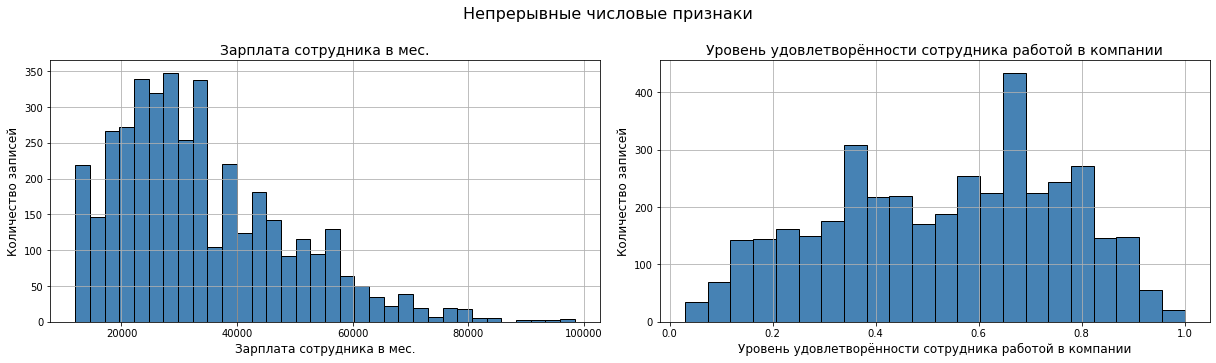

In [53]:
# Непрерывные числовые признаки

# Названия графиков

plot_titles = [ 'Зарплата сотрудника в мес.', 'Уровень удовлетворённости сотрудника работой в компании']

# Подписи для осей X и Y

x_labels =  [ 'Зарплата сотрудника в мес.', 'Уровень удовлетворённости сотрудника работой в компании']

y_labels = ['Количество записей']*2

# Используем цикл для построения гистограмм каждого признака

fig, axs = plt.subplots(1, 2, figsize=(17, 5))
axs = axs.flatten()
fig.suptitle(f"Непрерывные числовые признаки", size=16, y=1.0)

features = ['salary', 'job_satisfaction_rate']

for i, feature in enumerate(features):
    axs[i].hist(train_job_satisfaction_rate[feature], bins='auto', color='steelblue', edgecolor='black')
    axs[i].set_title(plot_titles[i], fontsize=14)
    axs[i].set_xlabel(x_labels[i], fontsize=12)
    axs[i].set_ylabel(y_labels[i], fontsize=12)
    axs[i].grid(True)

plt.tight_layout()
plt.show();

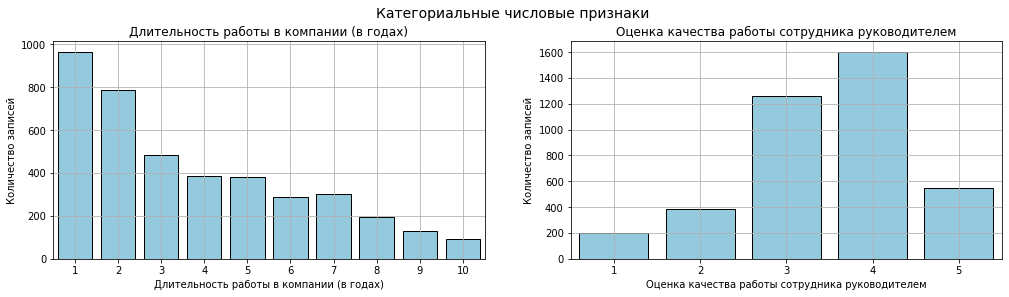

In [54]:
# Категориальные числовые признаки

# Названия графиков

plot_titles = [ 'Длительность работы в компании (в годах)', 'Оценка качества работы сотрудника руководителем']

# Подписи для осей X и Y

x_labels = [ 'Длительность работы в компании (в годах)', 'Оценка качества работы сотрудника руководителем']

y_labels = ['Количество записей']*2

# Используем цикл для построения гистограмм каждого признака

fig, axs = plt.subplots(1, 2, figsize=(17, 4))
axs = axs.flatten()
fig.suptitle(f"Категориальные числовые признаки", size=14, y=1.0)

features = ['employment_years', 'supervisor_evaluation']

for i, feature in enumerate(features):
    sns.countplot(x = train_job_satisfaction_rate[feature], color='SkyBlue', edgecolor='black', ax=axs[i])
    axs[i].set_title(plot_titles[i], fontsize=12)
    axs[i].set_xlabel(x_labels[i], fontsize=10)
    axs[i].set_ylabel(y_labels[i], fontsize=10)
    axs[i].grid(True)

plt.show();

Визуальная оценка показывает, что нормального (гауссовского) распределения нет ни в одной категории данных. (отметим это для расчета корреляции - коэффициент Спирмана уже не подходит).

In [55]:
# Создадим функцию для построения гистограммы распределения признака, гистограммы квантиль-квантиль и ящика с усамми

def feature_hist_qq_box (df, feature, x_title):
    fig, axes = plt.subplots(2,2, figsize=(17,11))
    fig.suptitle(f"Признак {feature}", size=16)
    
    sns.histplot(x=df[feature], ax=axes[0][0], kde=True, bins='auto');
    
    axes[0][0].set_title(f'Гистограмма распределения', fontsize=14)
    axes[0][0].set_xlabel(x_title, fontsize=12)
    axes[0][0].set_ylabel('Количество записей')
    
    qqplot(data=df[feature], ax=axes[0][1], line='s')
    axes[0][1].set_title(f'Гистограмма квантиль-квантиль', fontsize=14)
    axes[0][1].set_xlabel(x_title, fontsize=12)
    
    sns.boxplot(x=df[feature], color='SkyBlue', ax=axes[1][0])
    axes[1][0].set_title('Диаграмма размаха', fontsize=14)
    axes[1][0].set_xlabel(x_title, fontsize=12)
      
    plt.box(False)
    plt.xticks([])
    plt.yticks([])
    
    fig.show()  
    
    print(f'Медиана признака = {np.median(df[feature])}')

In [56]:
# Создадим функцию для рассчета коэффициентов распределения признака

def feature_distribution(df, feature):
    print(f'Коэффициент асимметрии = {df[feature].skew()}', '\n')
    print(f'Тест Шапиро-Уилка = {shapiro(df[feature])}', '\n')

Медиана признака = 30000.0


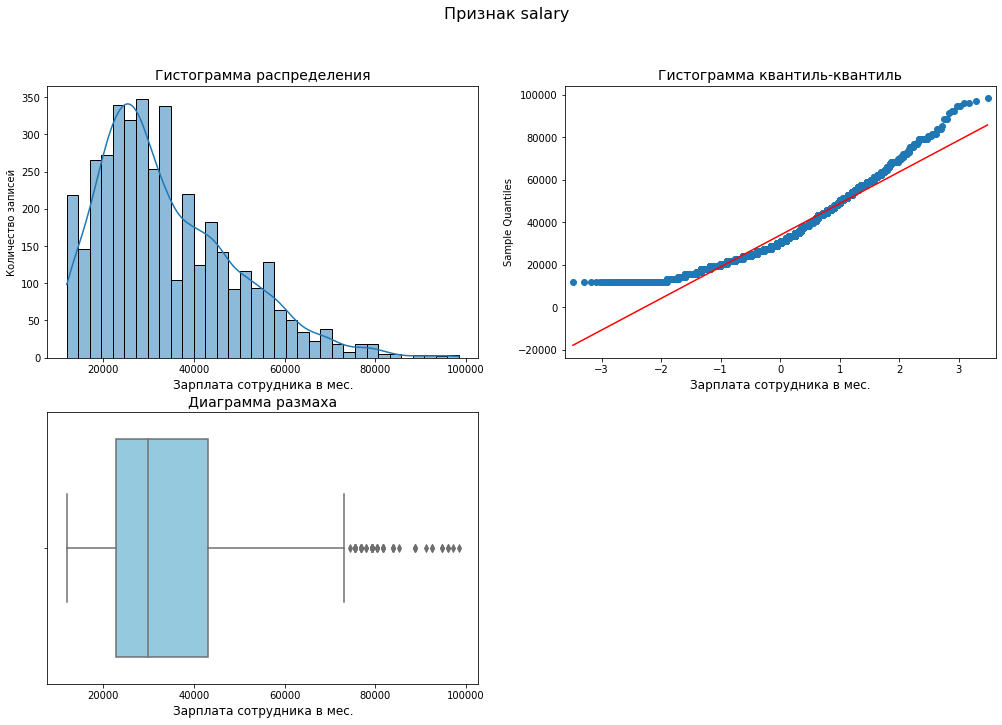

In [57]:
# Рассмотрим признак salary

feature_hist_qq_box(train_job_satisfaction_rate, 'salary', "Зарплата сотрудника в мес.")

In [58]:
feature_distribution(train_job_satisfaction_rate, 'salary')

Коэффициент асимметрии = 0.9266455919772832 

Тест Шапиро-Уилка = ShapiroResult(statistic=0.9387514591217041, pvalue=8.396205410765251e-38) 



Тест Шапиро-Уилка, и графики показывают, что признак не распределен нормально.

Медианное значение признака salary составляет 30 000. Ящик с усами относит значения от 7 500 и выше в выборосам: такой уровень зара.платы не типичен для основной части сотрудников. Но это не аномалия. Удалять эти данные мы не будем.

Медиана признака = 0.56


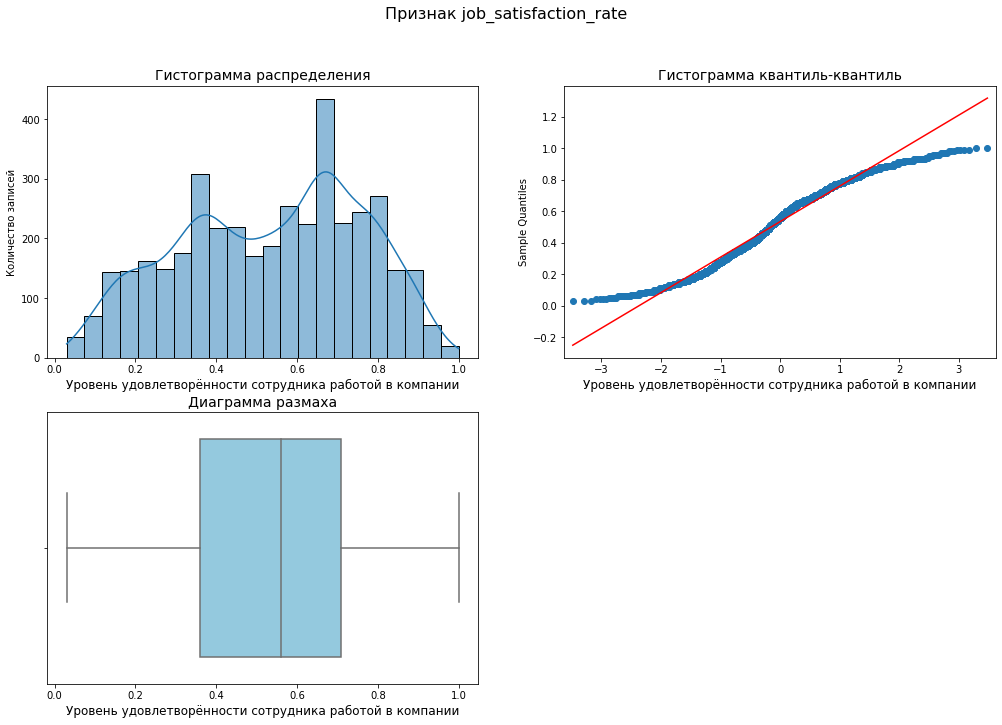

In [59]:
# Рассмотрим признак salary

feature_hist_qq_box(
    train_job_satisfaction_rate, 'job_satisfaction_rate', "Уровень удовлетворённости сотрудника работой в компании")

In [60]:
feature_distribution(train_job_satisfaction_rate, 'job_satisfaction_rate')

Коэффициент асимметрии = -0.20318174572345807 

Тест Шапиро-Уилка = ShapiroResult(statistic=0.9708877801895142, pvalue=8.90544324791322e-28) 



Признак не распределен нормально. Аномалий и выборосов нет. Медианное значение составляет 0,56. 

Рассмотрим признак более детально.

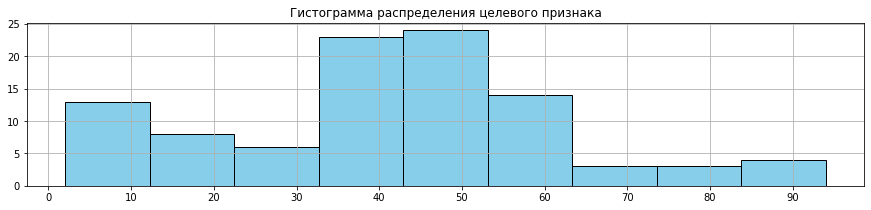

In [61]:
plt.figure(figsize=(15,3))
train_job_satisfaction_rate['job_satisfaction_rate'].value_counts().hist(bins='auto', color='SkyBlue', edgecolor='black')
plt.xticks(np.arange(0, max(train_job_satisfaction_rate['job_satisfaction_rate'].value_counts())+1, 10.0))
plt.title('Гистограмма распределения целевого признака');

Можно выделить 3 блока данных: низкий уровень - до 0,31, средний от 0,32 до 0,64, высокий - от 0,65 и выше. Посмотрим потом, нужно ли это будет или нет.

Медиана признака employment_years = 3.0
Медиана признака supervisor_evaluation = 4.0


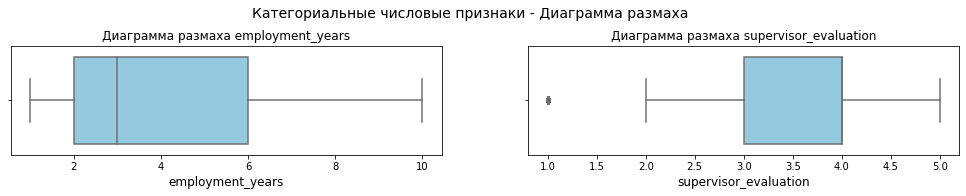

In [62]:
# Построим ящики с усами для категориальных числовых признаков

fig, axes = plt.subplots(1, 2, figsize=(17,2))
fig.suptitle(f"Категориальные числовые признаки - Диаграмма размаха", size=14, y=1.15)
features = ['employment_years', 'supervisor_evaluation']

for i, feature in enumerate(features):
    sns.boxplot(x=train_job_satisfaction_rate[feature], color='SkyBlue', ax=axes[i])
    axes[i].set_title(f'Диаграмма размаха {feature}', fontsize=12)
    axes[i].set_xlabel(feature, fontsize=12)
      
    fig.show()  
    
    print(f'Медиана признака {feature} = {np.median(train_job_satisfaction_rate[feature])}')    
    
    

Медианное время работы сотрудника составляет 3 года, выбросов и аномалий в данном признаке нет.

Медианная оценка сотрудника руководителем = 4. При этом оценка = 1 относится к выбросам: не характерно для основной части сотрудников.

In [63]:
# Выведем описание данных для файла с входными признаками

test_features.describe()

id  employment_years  supervisor_evaluation    salary
count   2000.000          2000.000               2000.000  2000.000
mean  552765.213             3.667                  3.526 34066.800
std   253851.326             2.537                  0.997 15398.437
min   100298.000             1.000                  1.000 12000.000
25%   339052.000             1.000                  3.000 22800.000
50%   550793.000             3.000                  4.000 30000.000
75%   765763.750             6.000                  4.000 43200.000
max   999029.000            10.000                  5.000 96000.000

Описание числовых данных схоже с тренировочным файлом. Нет явных аномалий. 

Среднее время работы составляет 3,667 лет, средняя оценка сотрудника руководителем 3,526, средняя зар.плата в месяц 34 066.

In [64]:
# # Создадим функцию для построения гистограммы распределения признака и ящика с усамми

def feature_hist_box (df, feature, x_title):
    
    fig, axes = plt.subplots(1,2, figsize=(17,4))
    fig.suptitle(f"Признак {feature}", size=14, y=1.05)
    
    sns.histplot(x=df[feature], ax=axes[0], kde=True, bins='auto');
    
    axes[0].set_title(f'Гистограмма распределения', fontsize=12)
    axes[0].set_xlabel(feature, fontsize=12)
    axes[0].set_ylabel('Количество записей')
    
    sns.boxplot(x=df[feature], color='SkyBlue', ax=axes[1])
    axes[1].set_title('Диаграмма размаха', fontsize=12)
    axes[1].set_xlabel(feature, fontsize=12)
    
    fig.show()  
    
    print(f'Медиана признака = ', np.median(df[feature]))

Медиана признака =  30000.0


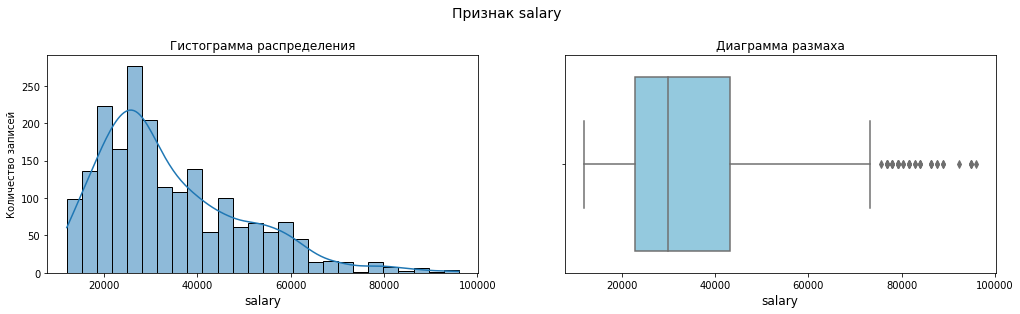

In [65]:
feature_hist_box(test_features, 'salary', 'salary')

Данные во входных признаках соответствуют данным тренировочного файла: Медиана 30 000, значения выше 7 500 отнесены к выбросам (не характерным для основной части) значениям. Распределение признака не является нормальным (гауссовским).

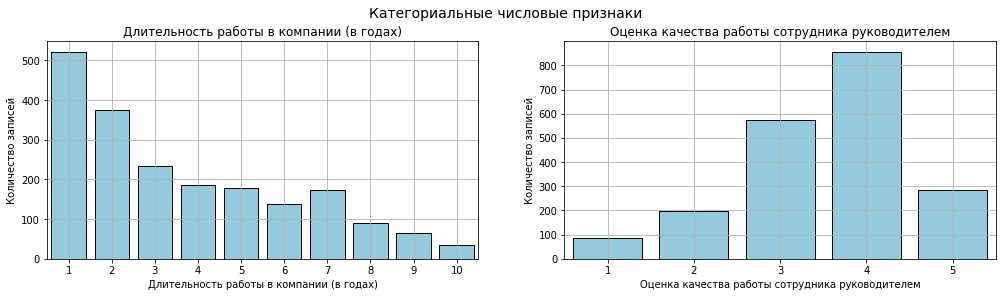

In [66]:
# Категориальные числовые признаки

# Названия графиков

plot_titles = [ 'Длительность работы в компании (в годах)', 'Оценка качества работы сотрудника руководителем']

# Подписи для осей X и Y

x_labels = [ 'Длительность работы в компании (в годах)', 'Оценка качества работы сотрудника руководителем']

y_labels = ['Количество записей']*2

# Используем цикл для построения гистограмм каждого признака

fig, axs = plt.subplots(1, 2, figsize=(17, 4))
axs = axs.flatten()
fig.suptitle(f"Категориальные числовые признаки", size=14, y=1.0)

features = ['employment_years', 'supervisor_evaluation']

for i, feature in enumerate(features):
    sns.countplot(x = test_features[feature], color='SkyBlue', edgecolor='black', ax=axs[i])
    axs[i].set_title(plot_titles[i], fontsize=12)
    axs[i].set_xlabel(x_labels[i], fontsize=10)
    axs[i].set_ylabel(y_labels[i], fontsize=10)
    axs[i].grid(True)

plt.show();

Категориальные числовые признаки также аналогичны тренировочному файлу.

In [67]:
test_target_job_satisfaction_rate.describe()

id  job_satisfaction_rate
count   2000.000               2000.000
mean  552765.213                  0.549
std   253851.326                  0.220
min   100298.000                  0.030
25%   339052.000                  0.380
50%   550793.000                  0.580
75%   765763.750                  0.720
max   999029.000                  1.000

Целевой признак тестовой выборки показывает чуть большие значения, чем в тренировочной. Но в целом данные сопоставимы: Среднее значение 0,549, минимальное 0,03, максимальное 1, значения групп (25-50-75%) на 0,01 выше, чем в тренировочном.

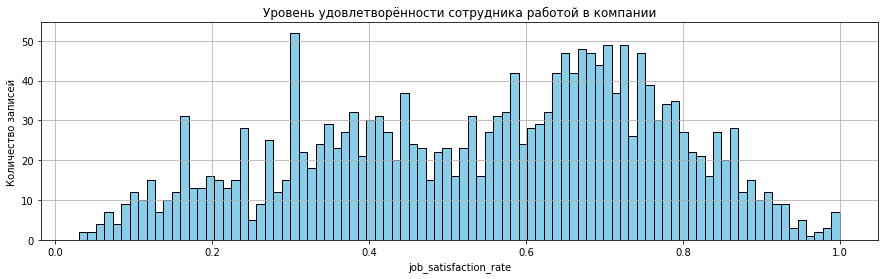

In [68]:
plt.figure(figsize=(15,4))
plt.hist(x=test_target_job_satisfaction_rate['job_satisfaction_rate'], bins=90, color='SkyBlue', edgecolor='black')
plt.title('Уровень удовлетворённости сотрудника работой в компании', fontsize=12)
plt.xlabel('job_satisfaction_rate', fontsize=10)
plt.ylabel('Количество записей', fontsize=10)
plt.grid(True)

Медиана признака =  0.58


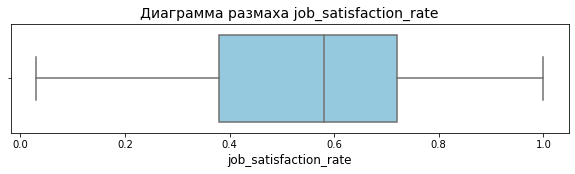

In [69]:
plt.figure(figsize=(10,2))
sns.boxplot(x=test_target_job_satisfaction_rate['job_satisfaction_rate'], color='SkyBlue')
plt.title('Диаграмма размаха job_satisfaction_rate', fontsize=14)
plt.xlabel('job_satisfaction_rate', fontsize=12);

print(f'Медиана признака = ', np.median(test_target_job_satisfaction_rate['job_satisfaction_rate']))

#### Категориальные данные

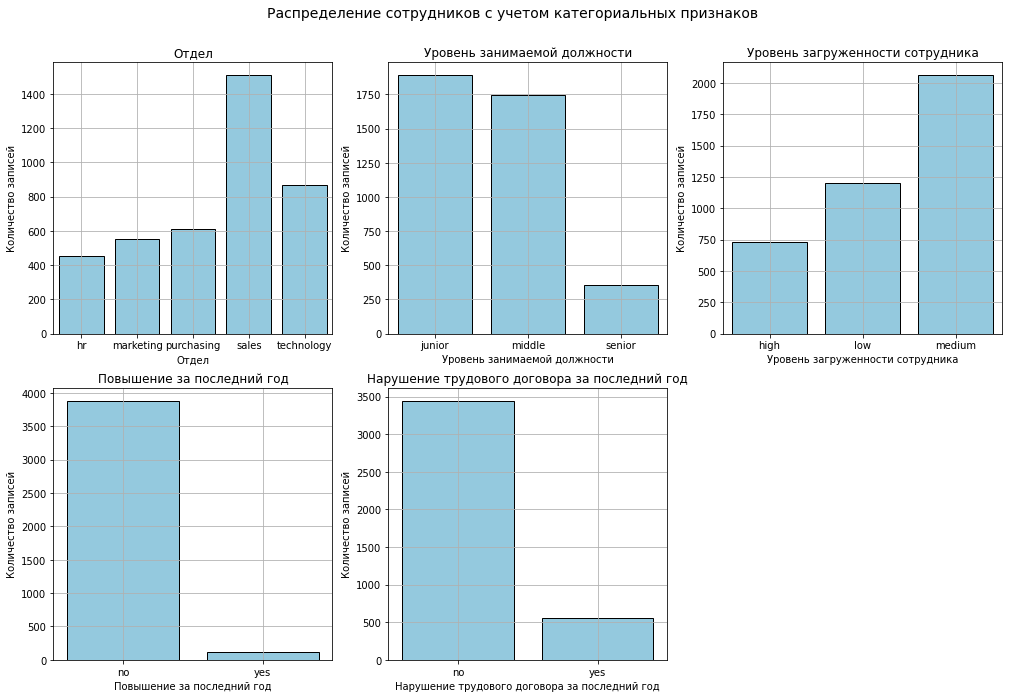

In [70]:
# Категориальные признаки тренировочного файла

# Названия графиков

plot_titles = ['Отдел', 'Уровень занимаемой должности', 'Уровень загруженности сотрудника',
               'Повышение за последний год', 'Нарушение трудового договора за последний год']

# Подписи для осей X и Y

x_labels = ['Отдел', 'Уровень занимаемой должности', 'Уровень загруженности сотрудника',
               'Повышение за последний год', 'Нарушение трудового договора за последний год']

y_labels = ['Количество записей']*5

# Используем цикл для построения гистограмм каждого признака

fig, axs = plt.subplots(2, 3, figsize=(17, 11))
axs = axs.flatten()
fig.suptitle(f"Распределение сотрудников с учетом категориальных признаков", size=14, y=0.95)

features = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']

for i, feature in enumerate(features):
    sns.countplot(x = train_job_satisfaction_rate[feature].sort_values(), color='SkyBlue', edgecolor='black', ax=axs[i])
    axs[i].set_title(plot_titles[i], fontsize=12)
    axs[i].set_xlabel(x_labels[i], fontsize=10)
    axs[i].set_ylabel(y_labels[i], fontsize=10)
    axs[i].grid(True)
    
    # Подписи данных почему-то не получилось добавить.
    
    #y=train_job_satisfaction_rate.groupby(feature)[feature].count()
    #for i in range(train_job_satisfaction_rate[feature].nunique()):
    #    plt.text(i,y[i]/2, y[i], ha = 'center', bbox = dict(facecolor = 'white', alpha =0.8))   
          
    plt.box(False)
    plt.xticks([])
    plt.yticks([])
    
plt.show();

Наибольшее число сотрудников работает в отделе Sales, на 2м месте - Technology, наименьшее в HR.

Основная часть сотрудников уровня Junior, чуть меньше - Middle, самая малочисленная группа - Senior (почти в 7 раз меньше, чем Junior).

Основная часть персонала имеет средний уровень загруженности, на 2м месте - низкий уровень загруженности, наименьшее число с высоким уровнем загруженности.

Крайне незначительному числу сотрудников зар.плата была повышена в последний год.

Восьмая часть персонала допускали нарушения трудового договора в послдений год.

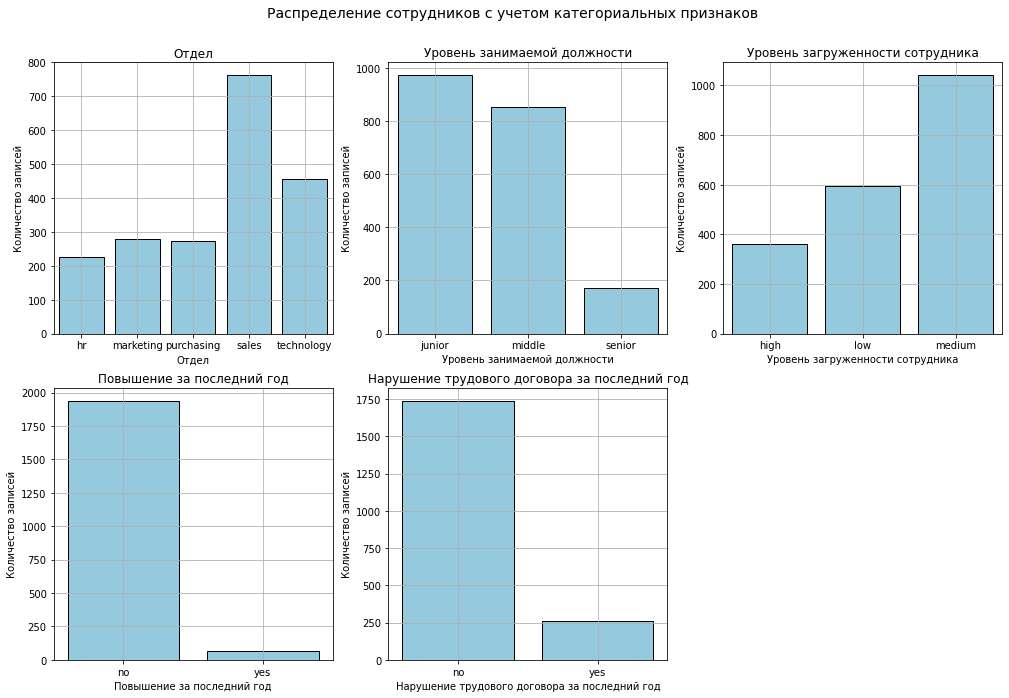

In [71]:
# Категориальные признаки тестового файла

# Названия графиков

plot_titles = ['Отдел', 'Уровень занимаемой должности', 'Уровень загруженности сотрудника',
               'Повышение за последний год', 'Нарушение трудового договора за последний год']

# Подписи для осей X и Y

x_labels = ['Отдел', 'Уровень занимаемой должности', 'Уровень загруженности сотрудника',
               'Повышение за последний год', 'Нарушение трудового договора за последний год']

y_labels = ['Количество записей']*5

# Используем цикл для построения гистограмм каждого признака

fig, axs = plt.subplots(2, 3, figsize=(17, 11))
axs = axs.flatten()
fig.suptitle(f"Распределение сотрудников с учетом категориальных признаков", size=14, y=0.95)

features = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']

for i, feature in enumerate(features):
    sns.countplot(x = test_features[feature].sort_values(), color='SkyBlue', edgecolor='black', ax=axs[i])
    axs[i].set_title(plot_titles[i], fontsize=12)
    axs[i].set_xlabel(x_labels[i], fontsize=10)
    axs[i].set_ylabel(y_labels[i], fontsize=10)
    axs[i].grid(True)
    
    # Подписи данных почему-то не получилось добавить.
    
    #y=train_job_satisfaction_rate.groupby(feature)[feature].count()
    #for i in range(train_job_satisfaction_rate[feature].nunique()):
    #    plt.text(i,y[i]/2, y[i], ha = 'center', bbox = dict(facecolor = 'white', alpha =0.8))   
          
    plt.box(False)
    plt.xticks([])
    plt.yticks([])
    
plt.show();

Распределение признаков аналогично предыдущему.

#### Взаимосвязи данных

Расммотрим разные сочетания признаков

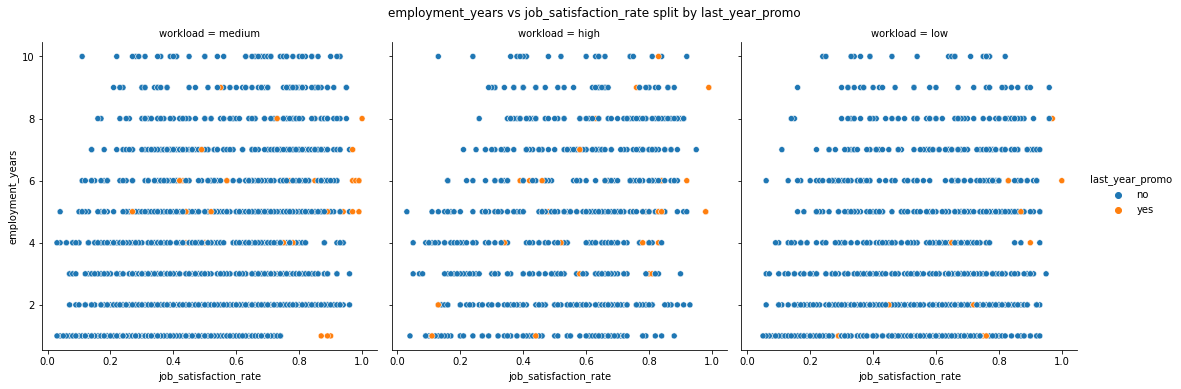

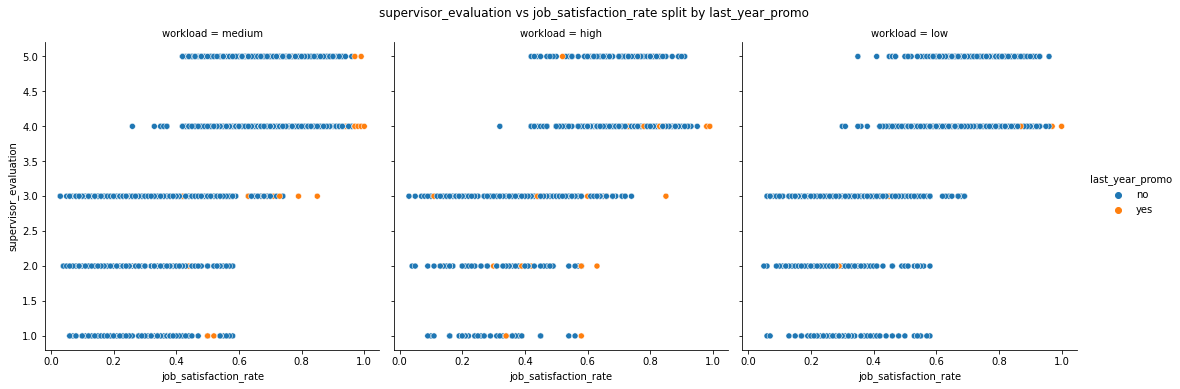

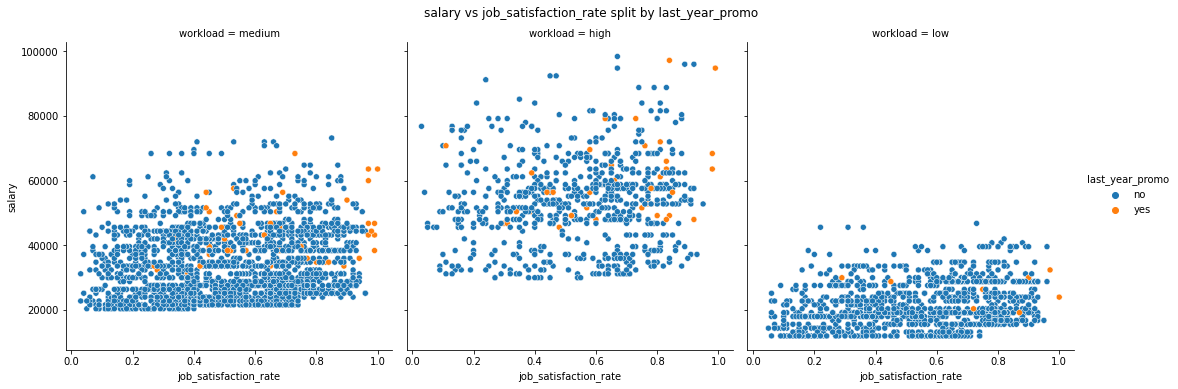

In [72]:
# Сочетание Удовлетворенности работой и других количественных признаков 
# в разбивке по степени загруженности и продвижению в последний год.

for i, item in enumerate(train_job_satisfaction_rate.drop(columns=['job_satisfaction_rate', 'id'], axis=1).select_dtypes(include='number')):
    sns.relplot(data=train_job_satisfaction_rate, x='job_satisfaction_rate', y=item, col='workload', hue='last_year_promo', 
                kind='scatter').fig.suptitle(f'{item} vs job_satisfaction_rate split by last_year_promo', y=1.03)
    
plt.show();

Сочетание Удовлетворенности работой и других количественных признаков в разбивке по уровню должности и продвижению в последний год.

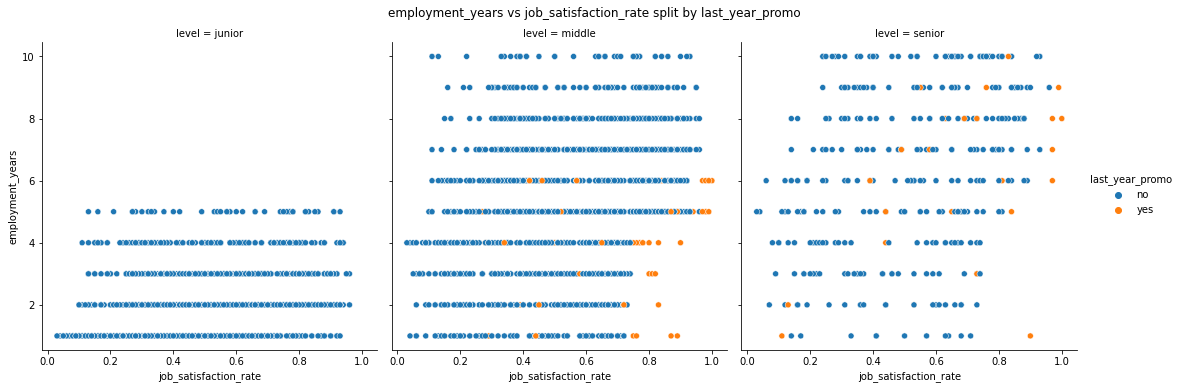

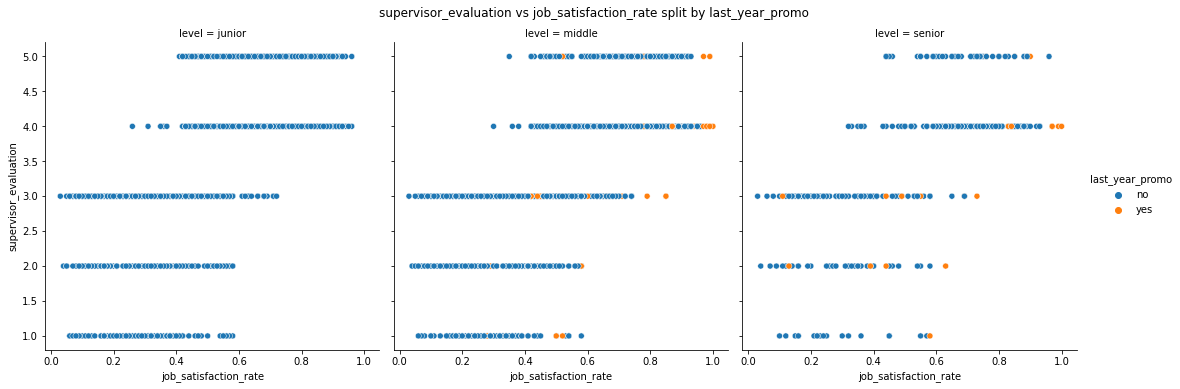

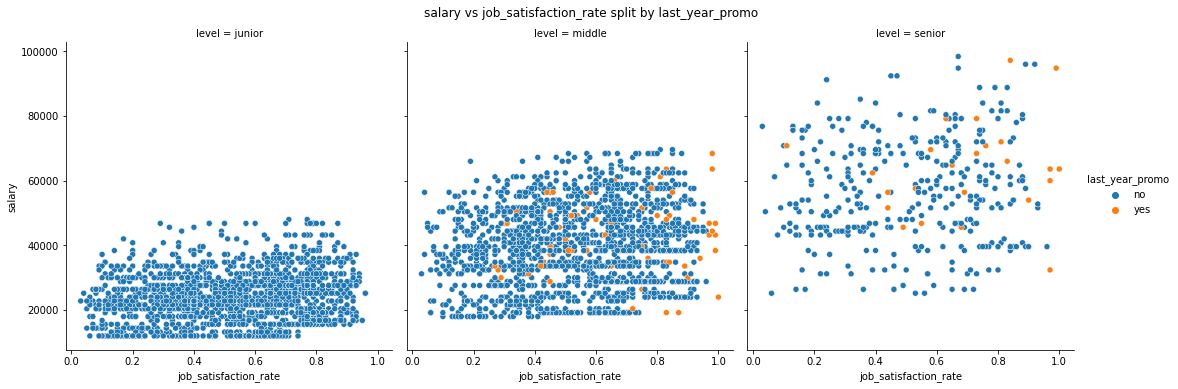

In [73]:
for i, item in enumerate(train_job_satisfaction_rate.drop(columns=['job_satisfaction_rate', 'id'], axis=1).select_dtypes(include='number')):
    sns.relplot(data=train_job_satisfaction_rate, x='job_satisfaction_rate', y=item, col='level', hue='last_year_promo',
                kind='scatter').fig.suptitle(f'{item} vs job_satisfaction_rate split by last_year_promo', y=1.03)
    
plt.show();

Сочетание Удовлетворенности работой и других количественных признаков в разбивке по степени загруженности и нарушениями трудового договора в последний год

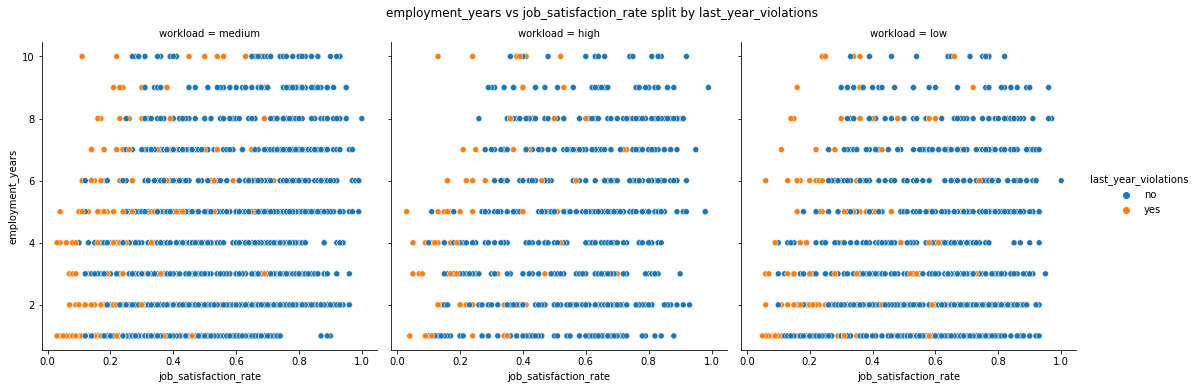

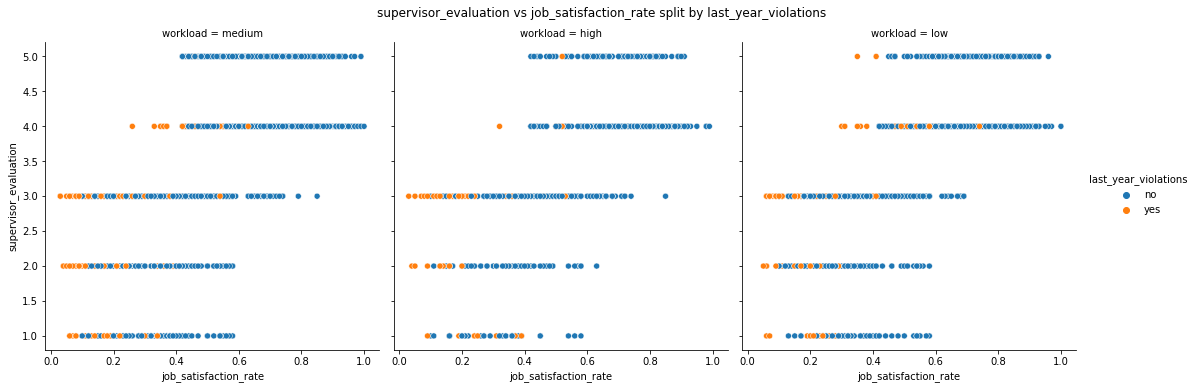

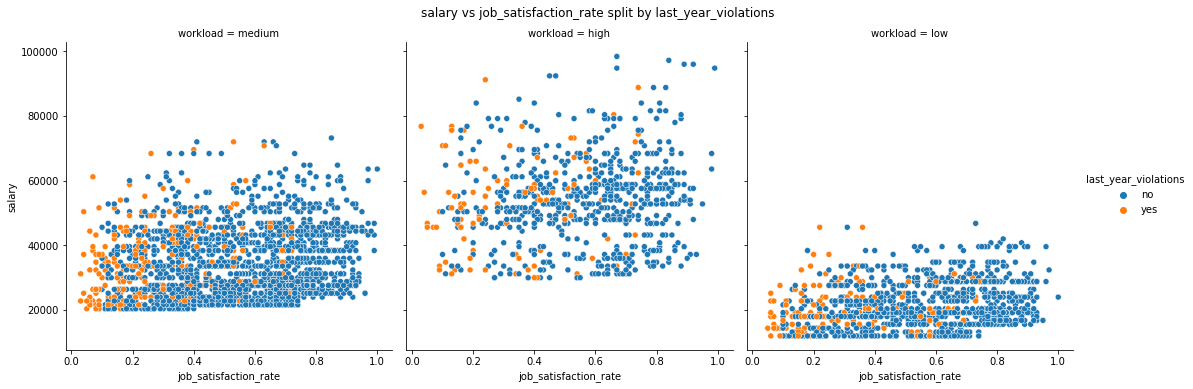

In [74]:
for i, item in enumerate(train_job_satisfaction_rate.drop(columns=['job_satisfaction_rate', 'id'], axis=1).select_dtypes(include='number')):
    sns.relplot(data=train_job_satisfaction_rate, x='job_satisfaction_rate', y=item, col='workload', hue='last_year_violations',
                kind='scatter').fig.suptitle(f'{item} vs job_satisfaction_rate split by last_year_violations', y=1.03)
    
plt.show();

Сочетание Удовлетворенности работой и других количественных признаков в разбивке по уровню должности и нарушениями трудового договора в последний год.

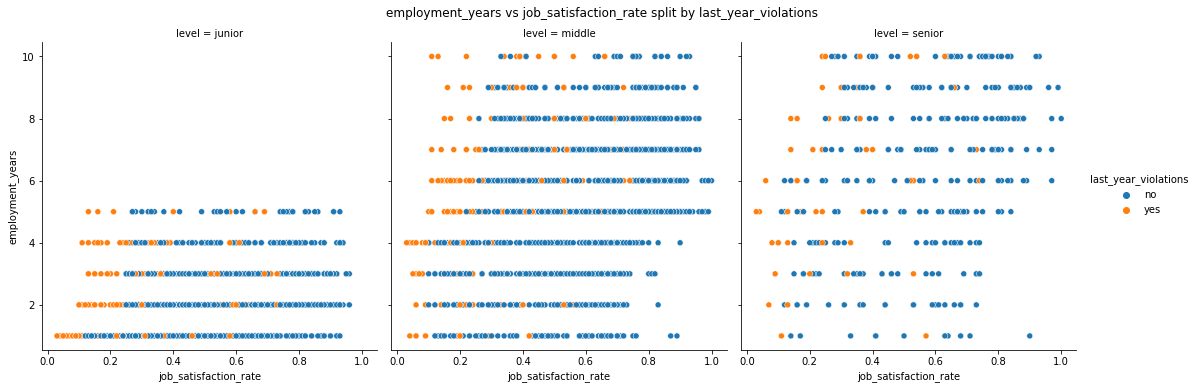

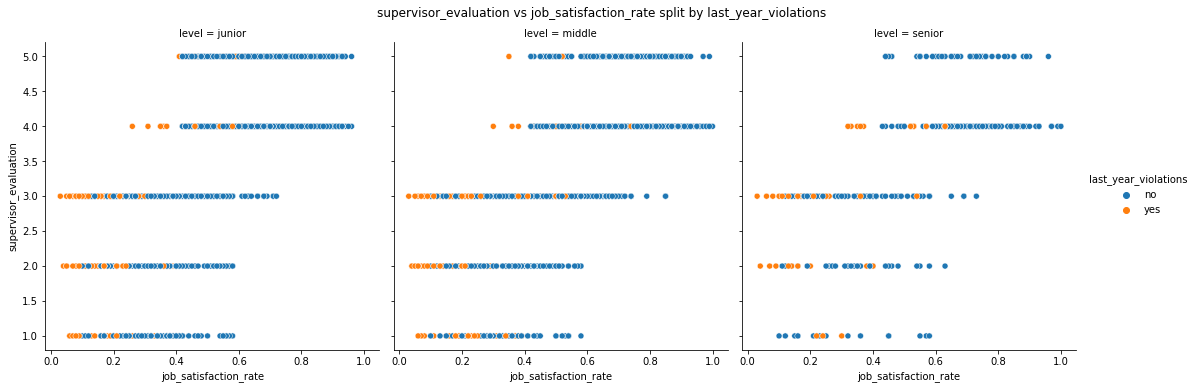

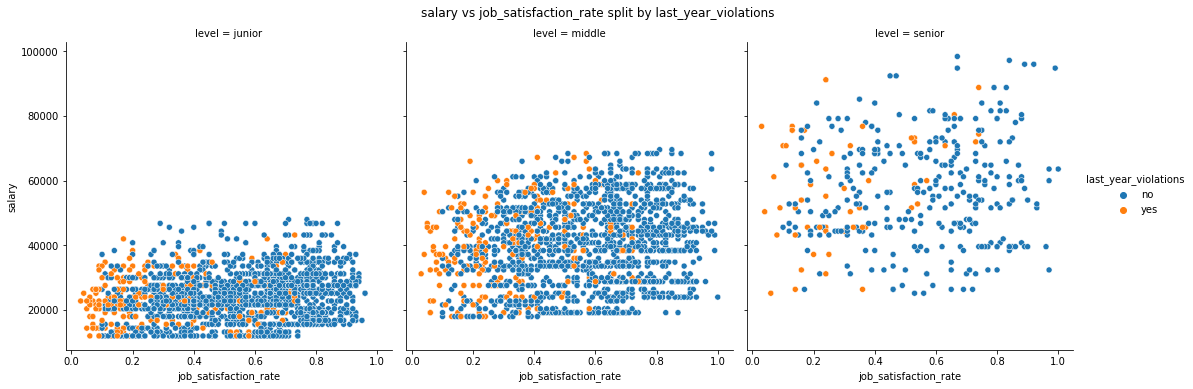

In [75]:
for i, item in enumerate(train_job_satisfaction_rate.drop(columns=['job_satisfaction_rate', 'id'], axis=1).select_dtypes(include='number')):
    sns.relplot(data=train_job_satisfaction_rate, x='job_satisfaction_rate', y=item, col='level', hue='last_year_violations',
                kind='scatter').fig.suptitle(f'{item} vs job_satisfaction_rate split by last_year_violations', y=1.03)
    
plt.show();

Здесь довольно ожидаемые результаты: при наличии продвижения в последний год степень удовлетворенности работой выше, при наличии нарушений трудового договора в послдений год степень удовлетворенности наименьшая.

Сотрудники уровня Junior не имеют продвижений в последний год, хотя время работы в компании у них до 5 лет.

Сотрудники с оценкой от руководителя = 5 имеют минимальный уровень нарушений, уровня senior - не имеют нарушений трудового договора.

Стоит отметить, что сотрудники уровня Senior имеют довольно большой разброс оплаты труда: от 30 000 (что соответствует среднему уровню Junior) до 100 000.

Зар.плата сотрудников с низкой загрузкой составляет от 5 000 до 40 000, со средней от 20 000 до 60 000, с высокой от 30 000 до 100 000 (в среднем около 60 000).

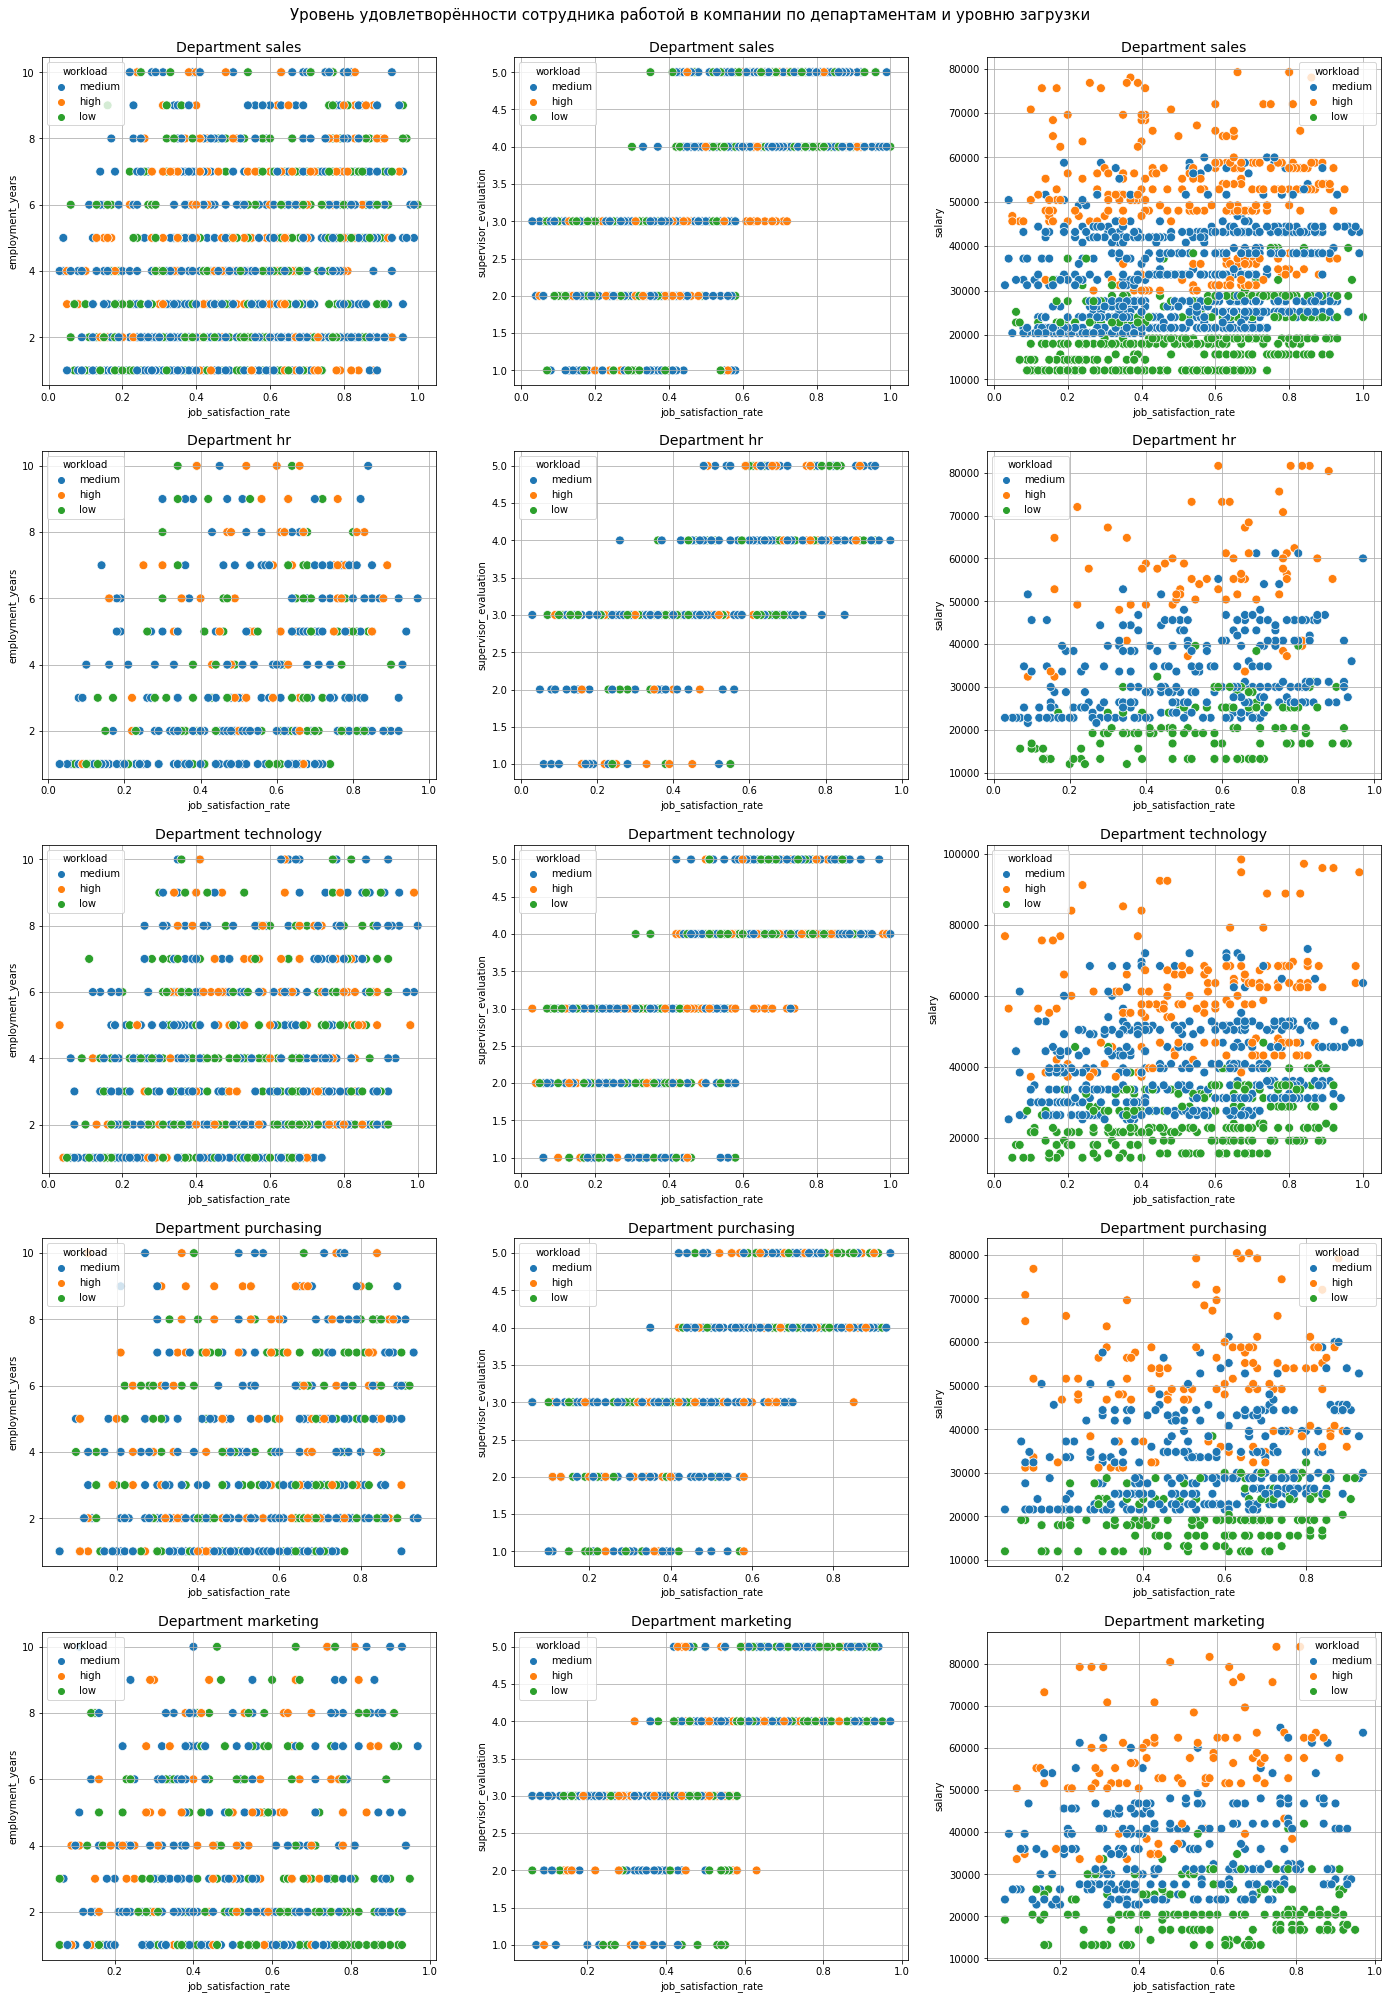

In [76]:
# Диаграмма рассеяния по отделам

fig, axs = plt.subplots(5, 3, figsize=(24, 35))

fig.suptitle(f"Уровень удовлетворённости сотрудника работой в компании по департаментам и уровню загрузки", size=15, y=0.9)

features = train_job_satisfaction_rate.drop(columns=['job_satisfaction_rate', 'id'], axis=1).select_dtypes(include='number').columns
departments = train_job_satisfaction_rate[~train_job_satisfaction_rate['dept'].isna()]['dept'].unique()
load = train_job_satisfaction_rate['workload'].sort_values()
#colors=['red', 'green', 'blue']

for j, item in enumerate(departments): 
    for i, feature in enumerate(features):
        sns.scatterplot(data=train_job_satisfaction_rate[train_job_satisfaction_rate['dept']==item], 
                        x='job_satisfaction_rate', y=feature, hue=load, s=78, ax=axs[j][i])
        axs[j][i].set_title(f'Department {item}', fontsize=14)
        axs[j][i].set_ylabel(feature, fontsize=10)
        axs[j][i].grid(True)
        
plt.show();

Здесь можно отметить, что макисмальные зар.платы - до 100 000 , в отделе Technology, в остальных отделах - до 80 000.

Также степень удовлетворенности сотрудника работой в компании от 0,4 до 1 соответствует оценке от руководителя 4 и 5.
При оценках от руководителя 1-3, степень удовлетворенности сотрудника работой в компании составляет от 0 до 0,7.

#### Корреляционный анализ

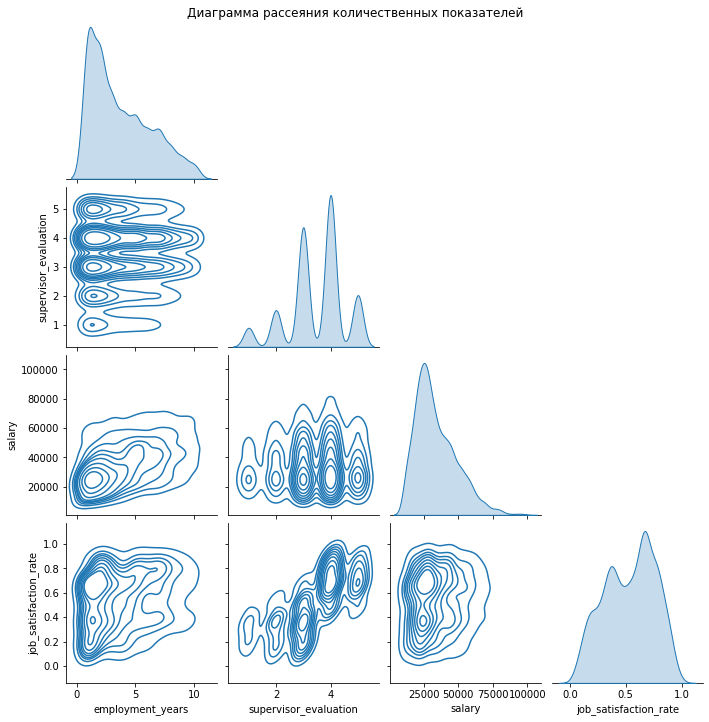

In [77]:
# Диаграмма рассеяния количественных показателей

pair_plot = sns.pairplot(train_job_satisfaction_rate.drop('id', axis=1), kind="kde",  corner=True)

pair_plot.fig.suptitle('Диаграмма рассеяния количественных показателей', y=1.0)
plt.show(); 

Прямой явной линейной зависимости не обнаружено. Похожа на линейную зависимость с оценкой от руководителя, зар.платой и временем работы в компании.

Рассмотрим корреляции с коээфициентами Спирмана и Фи

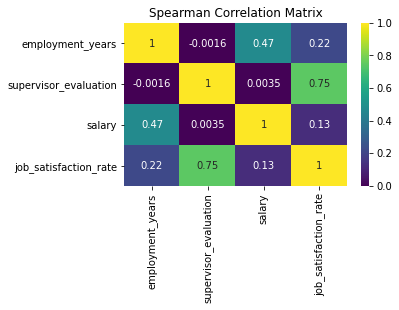

In [78]:
# Матрица корреляции числовых признаков Спирмана

fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(train_job_satisfaction_rate.drop('id', axis=1).corr(method='spearman'), annot=True, cmap='viridis')
plt.title('Spearman Correlation Matrix');

Наибольшая корреляция уровня удовлетворенности сотрудника работой в компании отмечена с оценкой со стороны руководителя, ниже среднего корреляция с периодом работы в компании, и намного ниже с уровнем зар.платы.

In [79]:
# Определим непрерывные признаки для корреляции Фи

interval_columns = ['salary', 'job_satisfaction_rate']

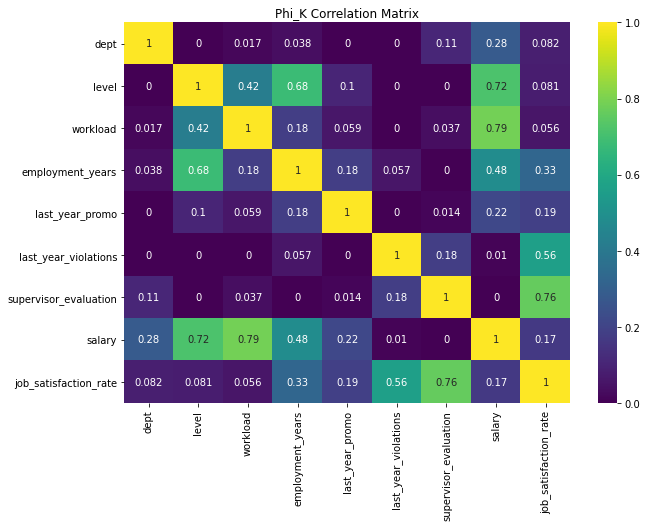

In [80]:
# Матрица корреляции Фи в целом для всех данных 

fig, ax = plt.subplots(figsize=(10, 7))

sns.heatmap(train_job_satisfaction_rate.drop('id', axis=1).phik_matrix(interval_cols=interval_columns, verbose=False), annot=True, cmap='viridis')

plt.title('Phi_K Correlation Matrix');

Мультиколлинеарности не отмечено.

Высокая корреляция уровня удовлетворенности сотрудника работой в компании отмечена по-прежнему с оценкой со стороны руководителя, чуть выше среднего - с нарушениями трудового договора в последний год, ниже среднего корреляция с периодом работы в компании, и намного ниже с повышением в последний год, затем с уровнем зар.платы. 

Отдел, уровень должности и уровень загрузки сотрудника, согласно данной матрицы, практически не влияет на степень удовлетворенности работой.

### Задание 2

В данньм случае речь идет о бинарной классификации, имеет смысл провести анализ по каждому из вариантов целевого признака.

Создадим два новых файла на базе исходного, с целевым признаком yes и no.

In [81]:
train_quit_yes = train_quit[train_quit['quit']=='yes']
train_quit_no = train_quit[train_quit['quit']=='no']

Проверим размеры новых файлов

In [82]:
train_quit_yes.shape

(1128, 10)

In [83]:
train_quit_no.shape

(2872, 10)

#### Числовые данные

In [84]:
# Исходный файл

train_quit.drop('id', axis=1).describe()

employment_years  supervisor_evaluation    salary
count          4000.000               4000.000  4000.000
mean              3.701                  3.475 33805.800
std               2.542                  1.004 15152.415
min               1.000                  1.000 12000.000
25%               2.000                  3.000 22800.000
50%               3.000                  4.000 30000.000
75%               6.000                  4.000 43200.000
max              10.000                  5.000 96000.000

Данные схожи с предыдущими файлами. Явных аномалий или расхождений не отмечено.

Среднее число лет работы в компании 3,7 (минимальное - 1, максимальное - 10), средняя оценка сотрудника руководителем 3,475 (минимальная - 1, максимальная - 5), средняя зар.плата  33 805 (минимальная 12 000, максимальная 96 000).

По значениям целевого признака.

In [85]:
train_quit_yes.drop('id', axis=1).describe()

employment_years  supervisor_evaluation    salary
count          1128.000               1128.000  1128.000
mean              1.845                  3.046 23885.106
std               1.275                  0.973  9351.600
min               1.000                  1.000 12000.000
25%               1.000                  3.000 16800.000
50%               1.000                  3.000 22800.000
75%               2.000                  4.000 27600.000
max              10.000                  5.000 79200.000

In [86]:
train_quit_no.drop('id', axis=1).describe()

employment_years  supervisor_evaluation    salary
count          2872.000               2872.000  2872.000
mean              4.431                  3.643 37702.228
std               2.545                  0.965 15218.977
min               1.000                  1.000 12000.000
25%               2.000                  3.000 25200.000
50%               4.000                  4.000 34800.000
75%               6.000                  4.000 46800.000
max              10.000                  5.000 96000.000

И здесь мы видим значительные отличия. В файле с уволившимися сотрудниками значительно ниже время работы в компании: в среднем 1,845 лет по сравнению с оставшимися 4,431 лет. Распределение 25-50-75% существенно ниже: 1-1-2 года по уволившимся сотрудникам, по сравнению с 2-4-6 лет у оставшихся. Минимальное и максимальное время работы совпадают: 1 и 10 лет.

Аналогичным образом намного ниже заработная плата уволившихся сотрудников: в среднем 23 885 против 37 702 у оставшихся. Минимальная зар.плата в обоих случаях составляет 12 000. А дальше начинает возрастать расхождение. 25-50-75% по уволившимся сотрудникам = 16 800 - 22 800 - 27 600, в то время как у оставшихся: 25 200 - 34 800 - 46 800 - примерно на 1/3 выше в каждом случае. Максимальная зар.плата уволившихся = 79 200, оставшихся 96 000.

Ниже и средняя оценка от руководителя: по уволившимся 3,046 по оставшимся 3,643. Расхождение заметно на отметке в 50%:  уволившиеся имеют оценку 3, оставшиеся 4.

Медиана признака = 30000.0


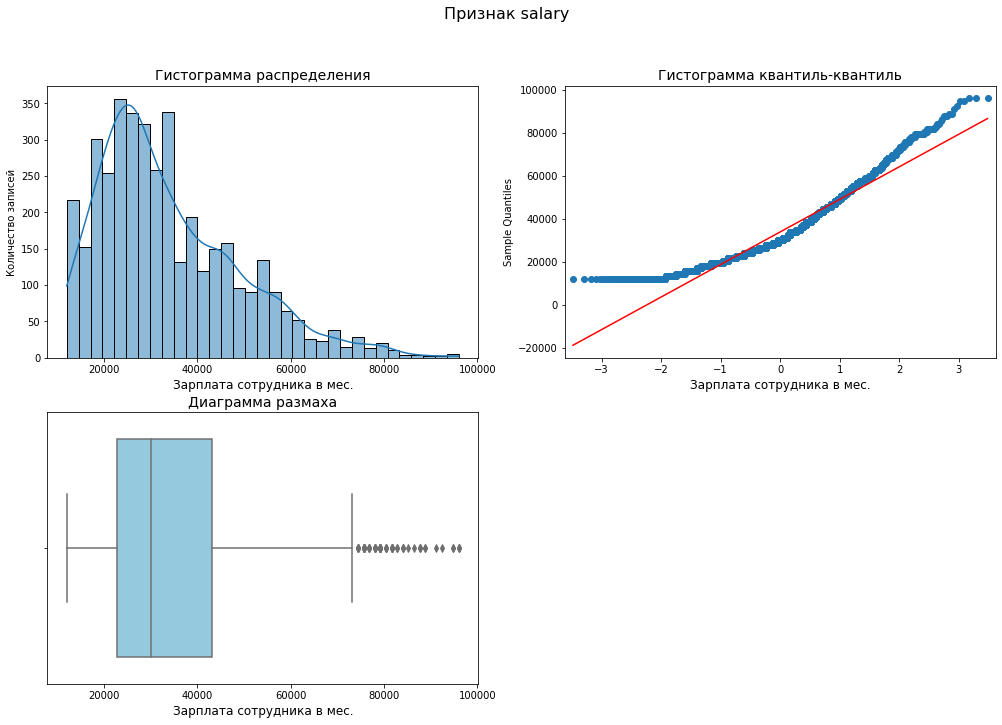

In [87]:
# Рассмотрим признак salary в целом

feature_hist_qq_box(train_quit, 'salary', "Зарплата сотрудника в мес.")

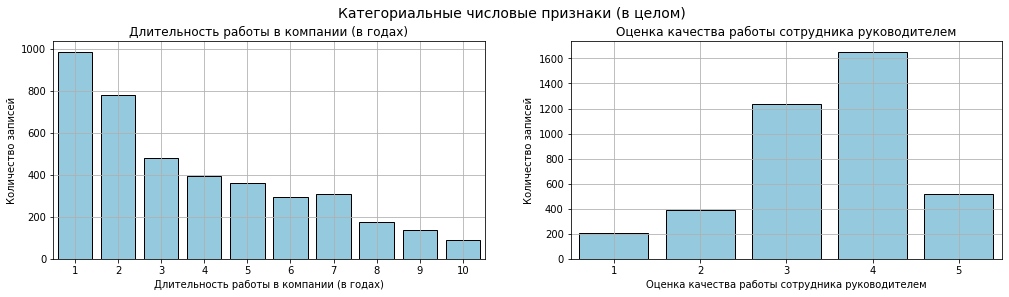

In [88]:
# Категориальные числовые признаки в целом

# Названия графиков

plot_titles = [ 'Длительность работы в компании (в годах)', 'Оценка качества работы сотрудника руководителем']

# Подписи для осей X и Y

x_labels = [ 'Длительность работы в компании (в годах)', 'Оценка качества работы сотрудника руководителем']

y_labels = ['Количество записей']*2

# Используем цикл для построения гистограмм каждого признака

fig, axs = plt.subplots(1, 2, figsize=(17, 4))
axs = axs.flatten()
fig.suptitle(f"Категориальные числовые признаки (в целом)", size=14, y=1.0)

features = ['employment_years', 'supervisor_evaluation']

for i, feature in enumerate(features):
    sns.countplot(x = train_quit[feature], color='SkyBlue', edgecolor='black', ax=axs[i])
    axs[i].set_title(plot_titles[i], fontsize=12)
    axs[i].set_xlabel(x_labels[i], fontsize=10)
    axs[i].set_ylabel(y_labels[i], fontsize=10)
    axs[i].grid(True)

plt.show();

В исходном файле числовые признаки соответствуют предыдущему анализу данных (для Задания 1)

По значениям целевого признака.

Медиана признака =  22800.0


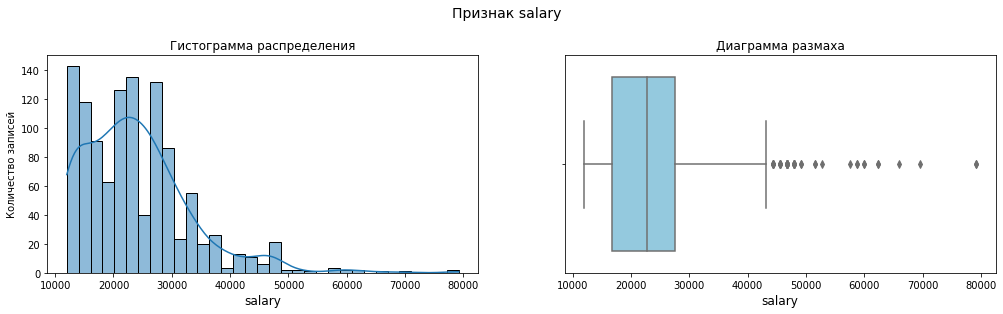

In [89]:
# Рассмотрим признак salary по уволившимся сотрудникам

feature_hist_box(train_quit_yes, 'salary', "Зарплата сотрудника в мес.")

Медиана признака =  34800.0


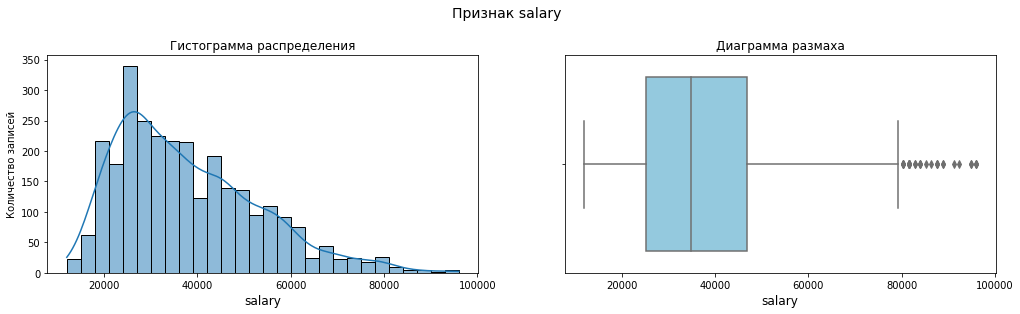

In [90]:
# Рассмотрим признак salary по оставшимся сотрудникам

feature_hist_box(train_quit_no, 'salary', "Зарплата сотрудника в мес.")

Для уволившихся сотрудников медиана заработной платы составляет 22 800, значения выше 43 000 уже относятся к выбросам.

Для оставшихся сотрудников медиана зар.платы =34 800, выбросы - это значения свыше 80 000.

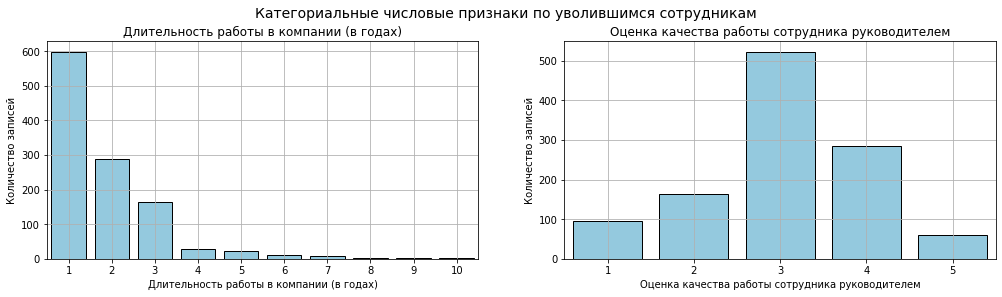

In [91]:
# Категориальные числовые признаки по уволившимся сотрудникам

# Названия графиков

plot_titles = [ 'Длительность работы в компании (в годах)', 'Оценка качества работы сотрудника руководителем']

# Подписи для осей X и Y

x_labels = [ 'Длительность работы в компании (в годах)', 'Оценка качества работы сотрудника руководителем']

y_labels = ['Количество записей']*2

# Используем цикл для построения гистограмм каждого признака

fig, axs = plt.subplots(1, 2, figsize=(17, 4))
axs = axs.flatten()
fig.suptitle(f"Категориальные числовые признаки по уволившимся сотрудникам", size=14, y=1.0)

features = ['employment_years', 'supervisor_evaluation']

for i, feature in enumerate(features):
    sns.countplot(x = train_quit_yes[feature], color='SkyBlue', edgecolor='black', ax=axs[i])
    axs[i].set_title(plot_titles[i], fontsize=12)
    axs[i].set_xlabel(x_labels[i], fontsize=10)
    axs[i].set_ylabel(y_labels[i], fontsize=10)
    axs[i].grid(True)

plt.show();

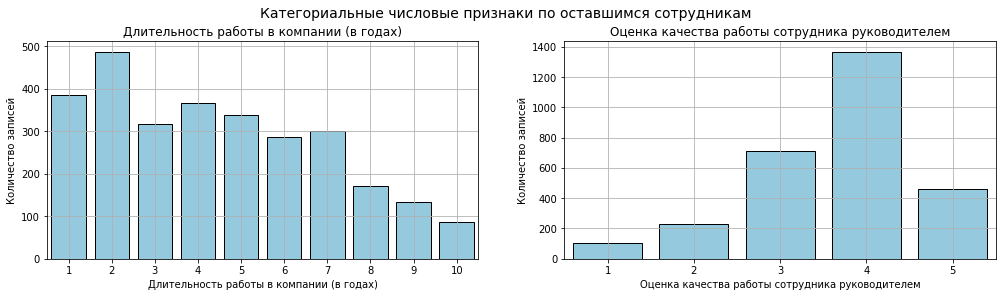

In [92]:
# Категориальные числовые признаки в целом

# Названия графиков

plot_titles = [ 'Длительность работы в компании (в годах)', 'Оценка качества работы сотрудника руководителем']

# Подписи для осей X и Y

x_labels = [ 'Длительность работы в компании (в годах)', 'Оценка качества работы сотрудника руководителем']

y_labels = ['Количество записей']*2

# Используем цикл для построения гистограмм каждого признака

fig, axs = plt.subplots(1, 2, figsize=(17, 4))
axs = axs.flatten()
fig.suptitle(f"Категориальные числовые признаки по оставшимся сотрудникам", size=14, y=1.0)

features = ['employment_years', 'supervisor_evaluation']

for i, feature in enumerate(features):
    sns.countplot(x = train_quit_no[feature], color='SkyBlue', edgecolor='black', ax=axs[i])
    axs[i].set_title(plot_titles[i], fontsize=12)
    axs[i].set_xlabel(x_labels[i], fontsize=10)
    axs[i].set_ylabel(y_labels[i], fontsize=10)
    axs[i].grid(True)

plt.show();

Отметим, что основная часть увольняется в первый год работы, примерно половина от этого числа во 2й год, и примерно треть - в третий год (хмм, интересно получилось, случайный символизм ) ). На этот период (1-3 года) стоит обратить внимание. Остальные увольнения (от 4х лет и выше) неизбежный естественный процесс движения персонала, и число уволившихся крайне мало.

Что касается оценки работы сотрудника со стороны руководителя, у уволившихся основная оценка 3 (оценка 5 - крайне редка), у оставшихся - 4 (оценка 5 на 3м месте, наименьшая группа с оценкой 1).

#### Категориальные данные

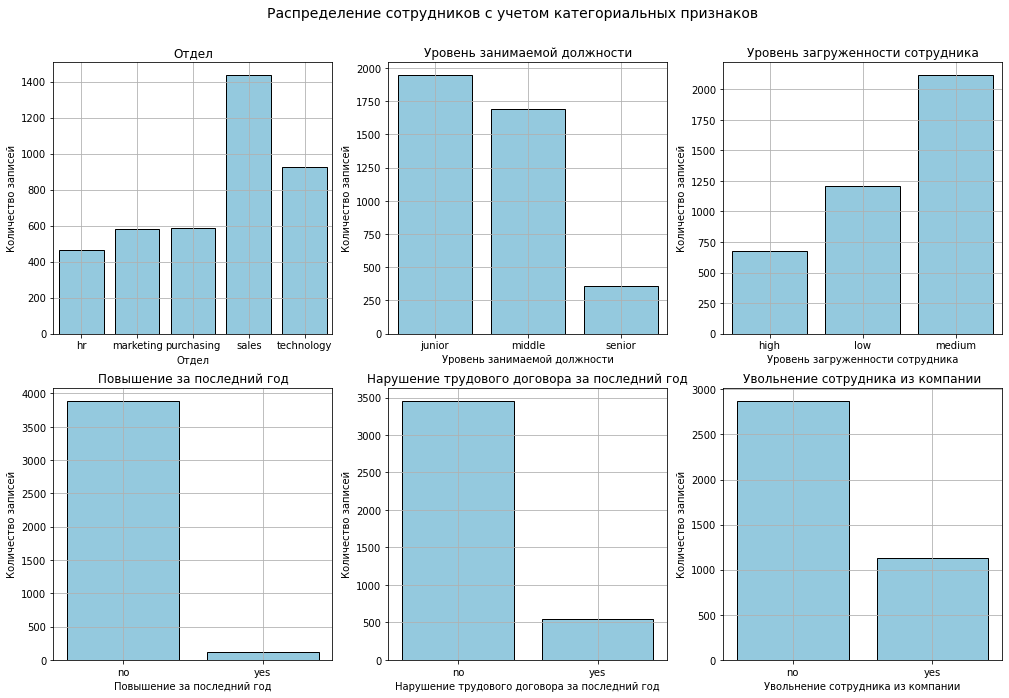

In [93]:
# Категориальные признаки тренировочного файла в целом

# Названия графиков

plot_titles = ['Отдел', 'Уровень занимаемой должности', 'Уровень загруженности сотрудника', 'Повышение за последний год', 
               'Нарушение трудового договора за последний год', 'Увольнение сотрудника из компании']

# Подписи для осей X и Y

x_labels = ['Отдел', 'Уровень занимаемой должности', 'Уровень загруженности сотрудника', 'Повышение за последний год', 
               'Нарушение трудового договора за последний год', 'Увольнение сотрудника из компании']

y_labels = ['Количество записей']*6

# Используем цикл для построения гистограмм каждого признака

fig, axs = plt.subplots(2, 3, figsize=(17, 11))
axs = axs.flatten()
fig.suptitle(f"Распределение сотрудников с учетом категориальных признаков", size=14, y=0.95)

features = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']

for i, feature in enumerate(features):
    sns.countplot(x = train_quit[feature].sort_values(), color='SkyBlue', edgecolor='black', ax=axs[i])
    axs[i].set_title(plot_titles[i], fontsize=12)
    axs[i].set_xlabel(x_labels[i], fontsize=10)
    axs[i].set_ylabel(y_labels[i], fontsize=10)
    axs[i].grid(True)
    
    # Подписи данных почему-то не получилось добавить.
    
    #y=train_job_satisfaction_rate.groupby(feature)[feature].count()
    #for i in range(train_job_satisfaction_rate[feature].nunique()):
    #    plt.text(i,y[i]/2, y[i], ha = 'center', bbox = dict(facecolor = 'white', alpha =0.8))   
         
plt.show();

In [94]:
test_target_quit.drop('id', axis=1).value_counts()

quit
no      1436
yes      564
dtype: int64

В целевом признаке можно отметить дисбаланс классов 1:3

Категориальные признаки в целом соответствуют предыдущему анализу данных (для Задания 1)

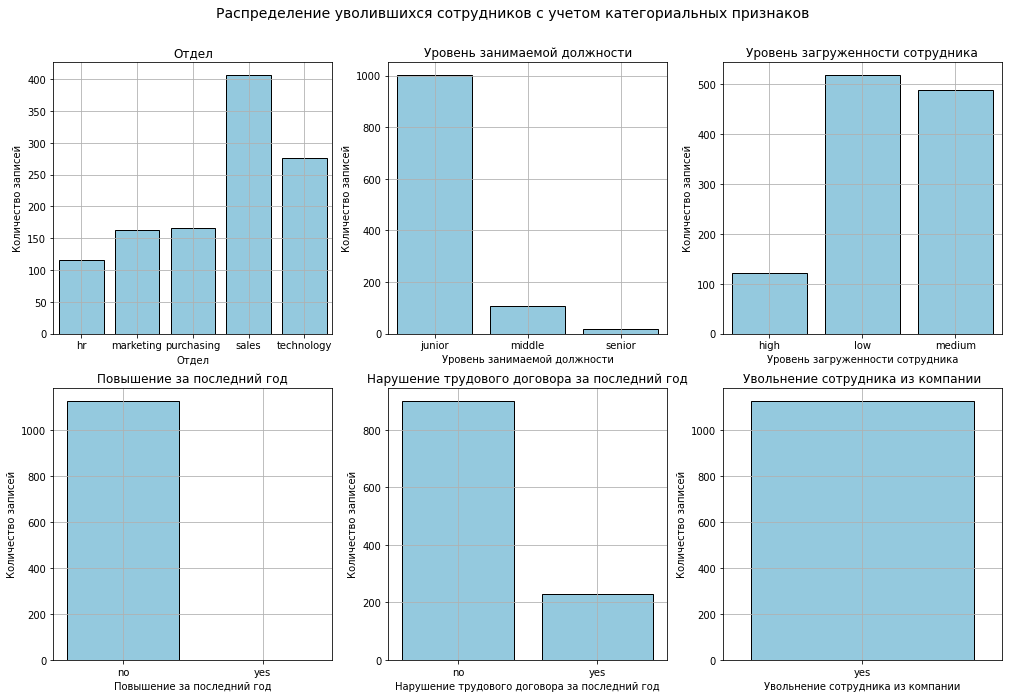

In [95]:
# Категориальные признаки по уволившимся сотрудникам

# Названия графиков

plot_titles = ['Отдел', 'Уровень занимаемой должности', 'Уровень загруженности сотрудника', 'Повышение за последний год', 
               'Нарушение трудового договора за последний год', 'Увольнение сотрудника из компании']

# Подписи для осей X и Y

x_labels = ['Отдел', 'Уровень занимаемой должности', 'Уровень загруженности сотрудника', 'Повышение за последний год', 
               'Нарушение трудового договора за последний год', 'Увольнение сотрудника из компании']

y_labels = ['Количество записей']*6

# Используем цикл для построения гистограмм каждого признака

fig, axs = plt.subplots(2, 3, figsize=(17, 11))
axs = axs.flatten()
fig.suptitle(f"Распределение уволившихся сотрудников с учетом категориальных признаков", size=14, y=0.95)

features = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']

for i, feature in enumerate(features):
    sns.countplot(x = train_quit_yes[feature].sort_values(), color='SkyBlue', edgecolor='black', ax=axs[i])
    axs[i].set_title(plot_titles[i], fontsize=12)
    axs[i].set_xlabel(x_labels[i], fontsize=10)
    axs[i].set_ylabel(y_labels[i], fontsize=10)
    axs[i].grid(True)
    
plt.show();

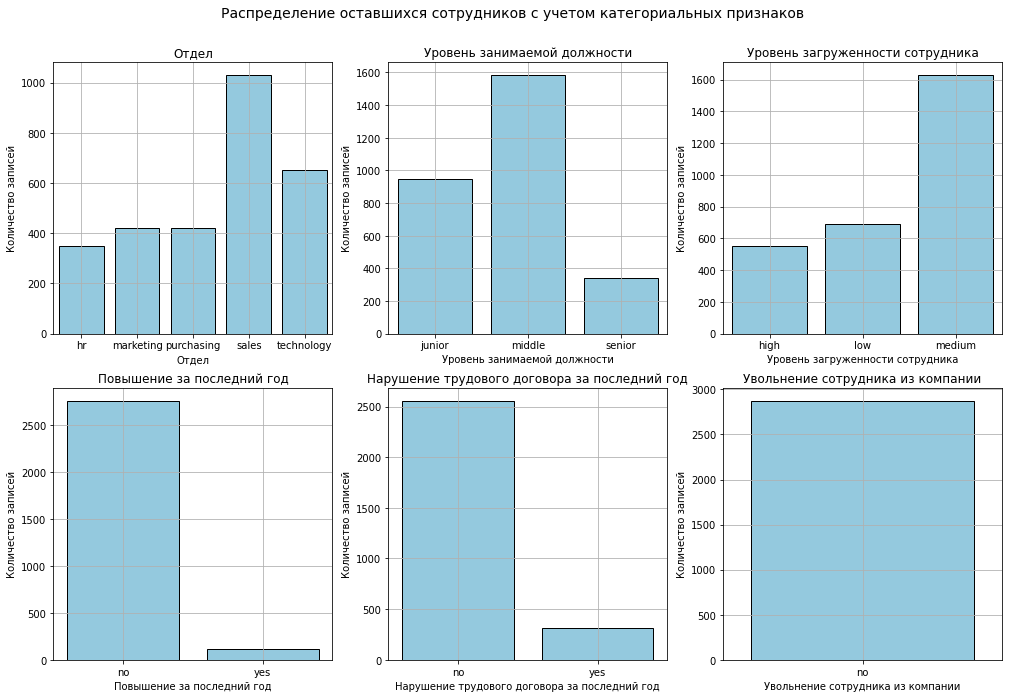

In [96]:
# Категориальные признаки оставшихся сотрудников

# Названия графиков

plot_titles = ['Отдел', 'Уровень занимаемой должности', 'Уровень загруженности сотрудника', 'Повышение за последний год', 
               'Нарушение трудового договора за последний год', 'Увольнение сотрудника из компании']

# Подписи для осей X и Y

x_labels = ['Отдел', 'Уровень занимаемой должности', 'Уровень загруженности сотрудника', 'Повышение за последний год', 
               'Нарушение трудового договора за последний год', 'Увольнение сотрудника из компании']

y_labels = ['Количество записей']*6

# Используем цикл для построения гистограмм каждого признака

fig, axs = plt.subplots(2, 3, figsize=(17, 11))
axs = axs.flatten()
fig.suptitle(f"Распределение оставшихся сотрудников с учетом категориальных признаков", size=14, y=0.95)

features = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']

for i, feature in enumerate(features):
    sns.countplot(x = train_quit_no[feature].sort_values(), color='SkyBlue', edgecolor='black', ax=axs[i])
    axs[i].set_title(plot_titles[i], fontsize=12)
    axs[i].set_xlabel(x_labels[i], fontsize=10)
    axs[i].set_ylabel(y_labels[i], fontsize=10)
    axs[i].grid(True)
             
plt.show();

По отделам - число уволившихся и оставшихся сотрудников соответствует в целом численности сотрудников в разных отделах.

По уровню занимаемой должности увольняются обычно Junior, гораздо меньше Middle и крайне мало Senior. Среди оставшихся большинство сотрудников уровня MIddle, затем Junior и самая малочисленная группа Senior. (что в общем-то логично).

Любопытно, что увольняются в большинстве сотрудники с низким и затем среднем уровнем загруженности. Среди оставшихся основной уровень загрузки средний, затем низкий и высокий (примерно треть от числа сотрудников со средним уровнем загрузки).

Среди уволившихся не было повышений за последний год. Среди оставшихся - это число крайне мало.

Среди уволившихся чуть выше уровень нарушений трудового договора в последний год.

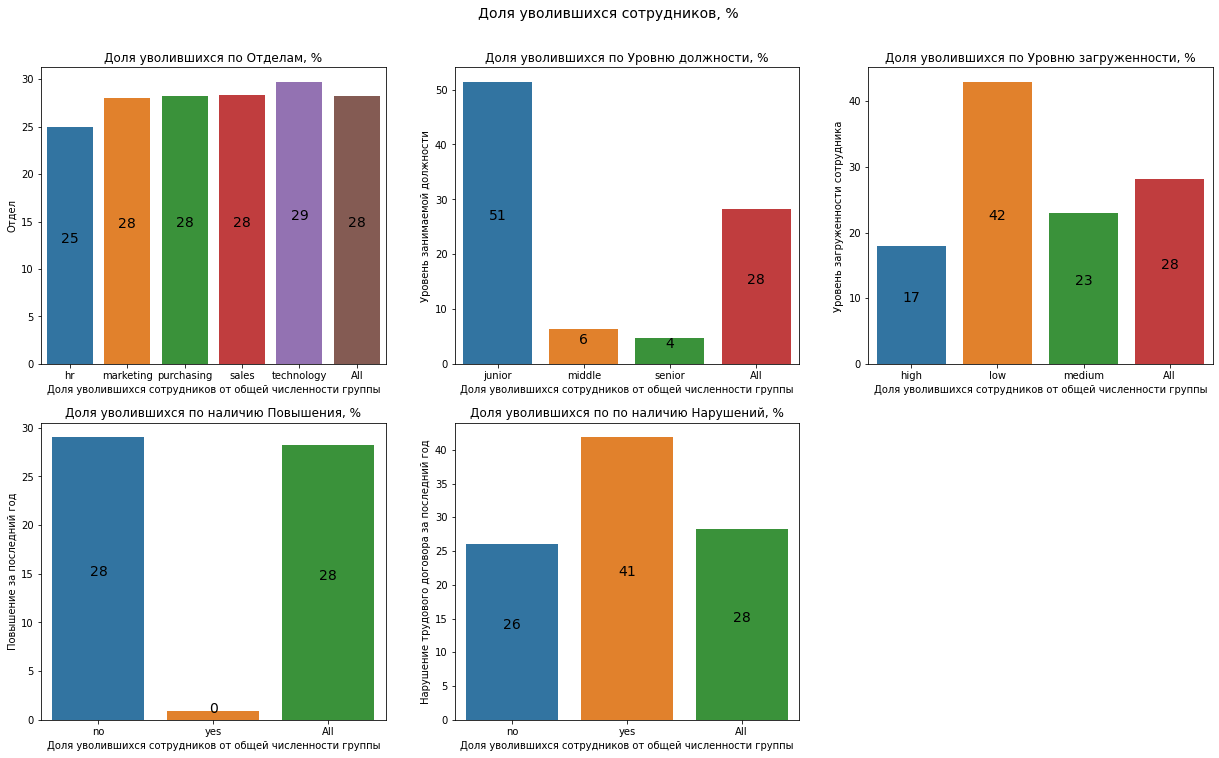

In [97]:
# Доля уволившихся сотрудников, % на графике

# Названия графиков

plot_titles = ['Доля уволившихся по Отделам, %', 'Доля уволившихся по Уровню должности, %', 
               'Доля уволившихся по Уровню загруженности, %', 'Доля уволившихся по наличию Повышения, %', 
               'Доля уволившихся по по наличию Нарушений, %']

# Подписи для осей X и Y

x_labels = ['Доля уволившихся сотрудников от общей численности группы']*5

y_labels = ['Отдел', 'Уровень занимаемой должности', 'Уровень загруженности сотрудника', 'Повышение за последний год', 
               'Нарушение трудового договора за последний год']

# Используем цикл для построения гистограмм каждого признака

fig, axs = plt.subplots(2, 3, figsize=(21, 12))
axs = axs.flatten()
fig.suptitle(f"Доля уволившихся сотрудников, %", size=14, y=0.95)

features = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']

for i, feature in enumerate(features):
    
    p=train_quit.pivot_table(index=[feature], columns='quit', values='id', aggfunc=['count'], margins=True)
    p['rate'] = (p['count']['yes'] / p['count']['All'])*100
    
    sns.barplot(data=p, y='rate', x=p.index, ax=axs[i])
    for p in axs[i].patches:
        axs[i].text(p.get_x() + p.get_width() / 2., p.get_height()/2, int(p.get_height()), 
                   fontsize=14, ha='center', va='bottom')
    
    axs[i].set_title(plot_titles[i], fontsize=12)
    axs[i].set_xlabel(x_labels[i], fontsize=10)
    axs[i].set_ylabel(y_labels[i], fontsize=10)
    #axs[i].grid(True, color="LightBlue")
          
    plt.box(False)
    plt.xticks([])
    plt.yticks([])
                 
plt.show();

Если рассматривать долю уволившихся сотрудников, то результаты следующие.

По отделам: наибольший процент в Technology = 29.7%, Sales = 28.3%, Purchasing 28,2%, Marketing 28%, HR = 25%.

По уровню должности: Junior = 51.5%, Middle = 6.4%, Senior = 4.8%

По уровню загрузки: low = 43%, medium = 23%, high = 18%.

Из числа НЕ имевших продвижение в последний год уволилось 29%, имевших продвижение - 0,9%.

Из числа имевших нарушение трдового договора в последний год уволилось 41,8%, НЕ имевших нарушений - 26%.

#### Взаимосвязи данных

Поскольку данные в целом практически не отличаются от рассмотренных в Задании 1, чтобы не загружать проект, перейдем сразу к файлам по видам целевого признака.

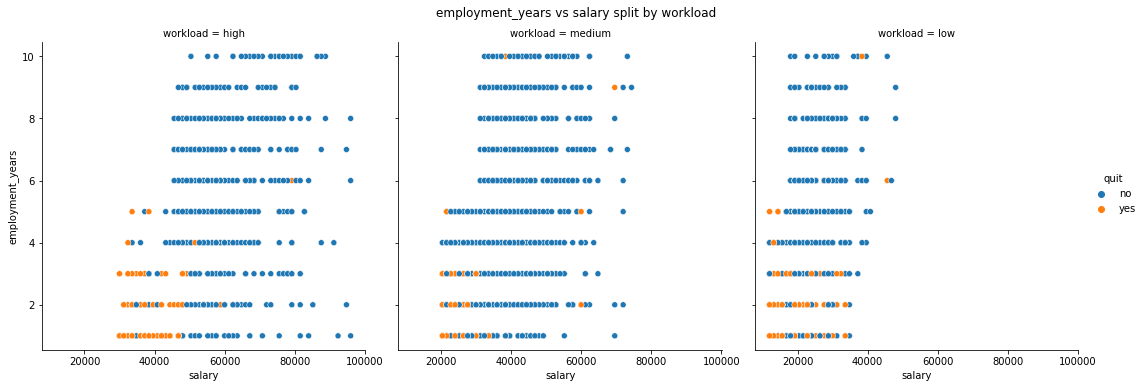

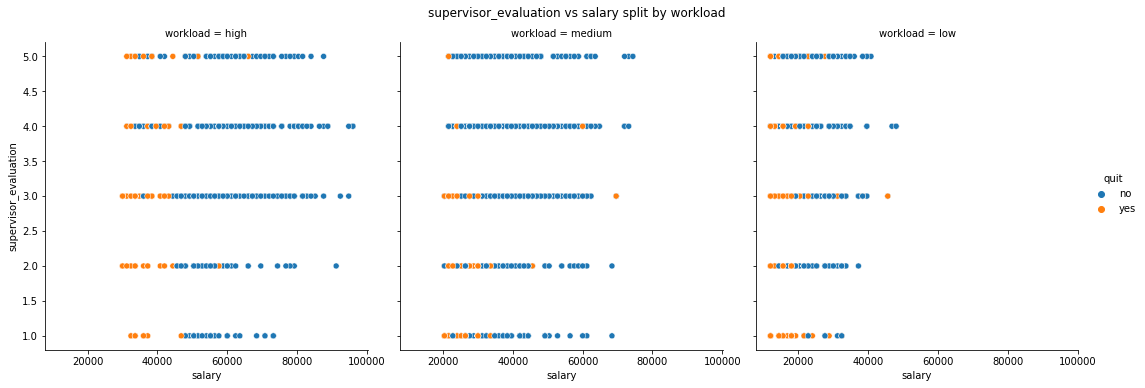

In [98]:
# Сочетание Зар.платы, времени работы и оценки от руководителя 
# в разбивке по степени загруженности и увольнениям.

for i, item in enumerate(train_quit.drop(columns=['salary', 'id'], axis=1).select_dtypes(include='number')):
    sns.relplot(data=train_quit, x='salary', y=item, col='workload', hue='quit', 
                kind='scatter').fig.suptitle(f'{item} vs salary split by workload', y=1.03)
    
plt.show();

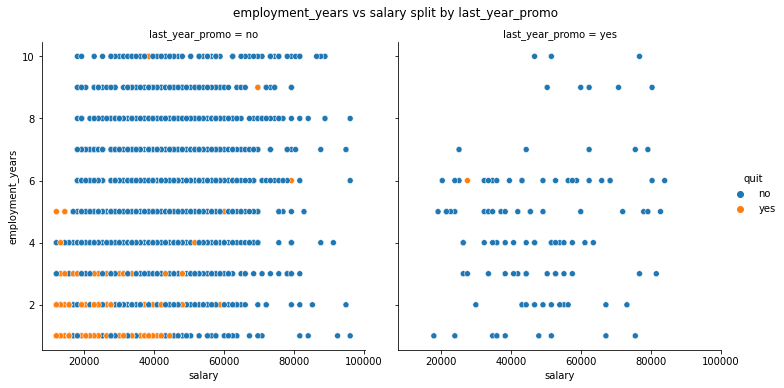

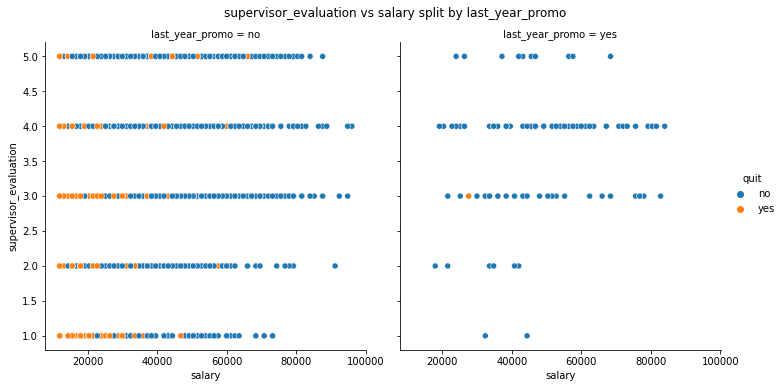

In [99]:
# Сочетание Зар.платы, времени работы и оценки от руководителя 
# в разбивке по продвижению за послдений год и увольнениям.

for i, item in enumerate(train_quit.drop(columns=['salary', 'id'], axis=1).select_dtypes(include='number')):
    sns.relplot(data=train_quit, x='salary', y=item, col='last_year_promo', hue='quit', 
                kind='scatter').fig.suptitle(f'{item} vs salary split by last_year_promo', y=1.03)
    
plt.show();

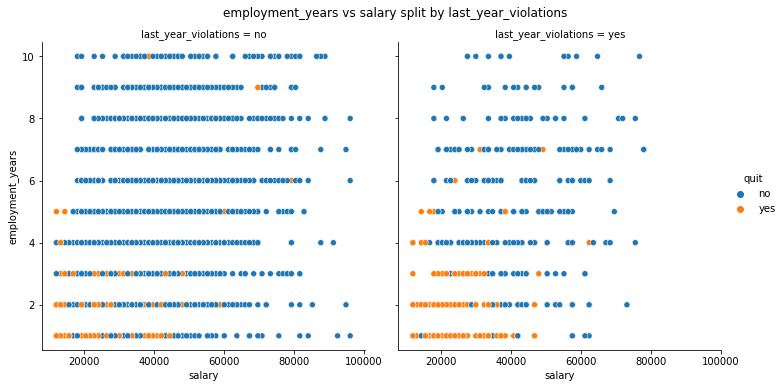

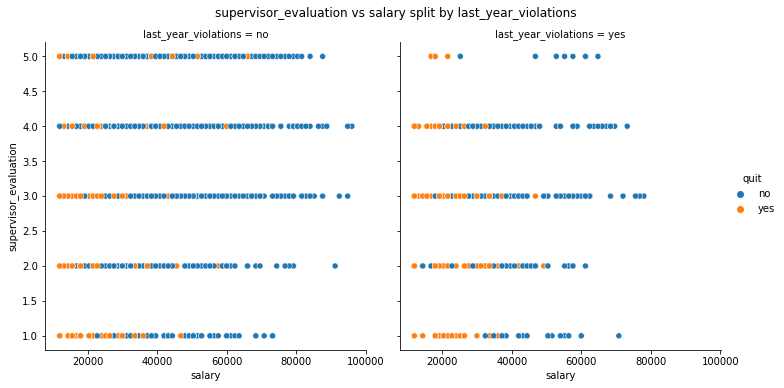

In [100]:
# Сочетание Зар.платы, времени работы и оценки от руководителя 
# в разбивке по нарушениям трудового договора и увольнениям.

for i, item in enumerate(train_quit.drop(columns=['salary', 'id'], axis=1).select_dtypes(include='number')):
    sns.relplot(data=train_quit, x='salary', y=item, col='last_year_violations', hue='quit', 
                kind='scatter').fig.suptitle(f'{item} vs salary split by last_year_violations', y=1.03)
    
plt.show();

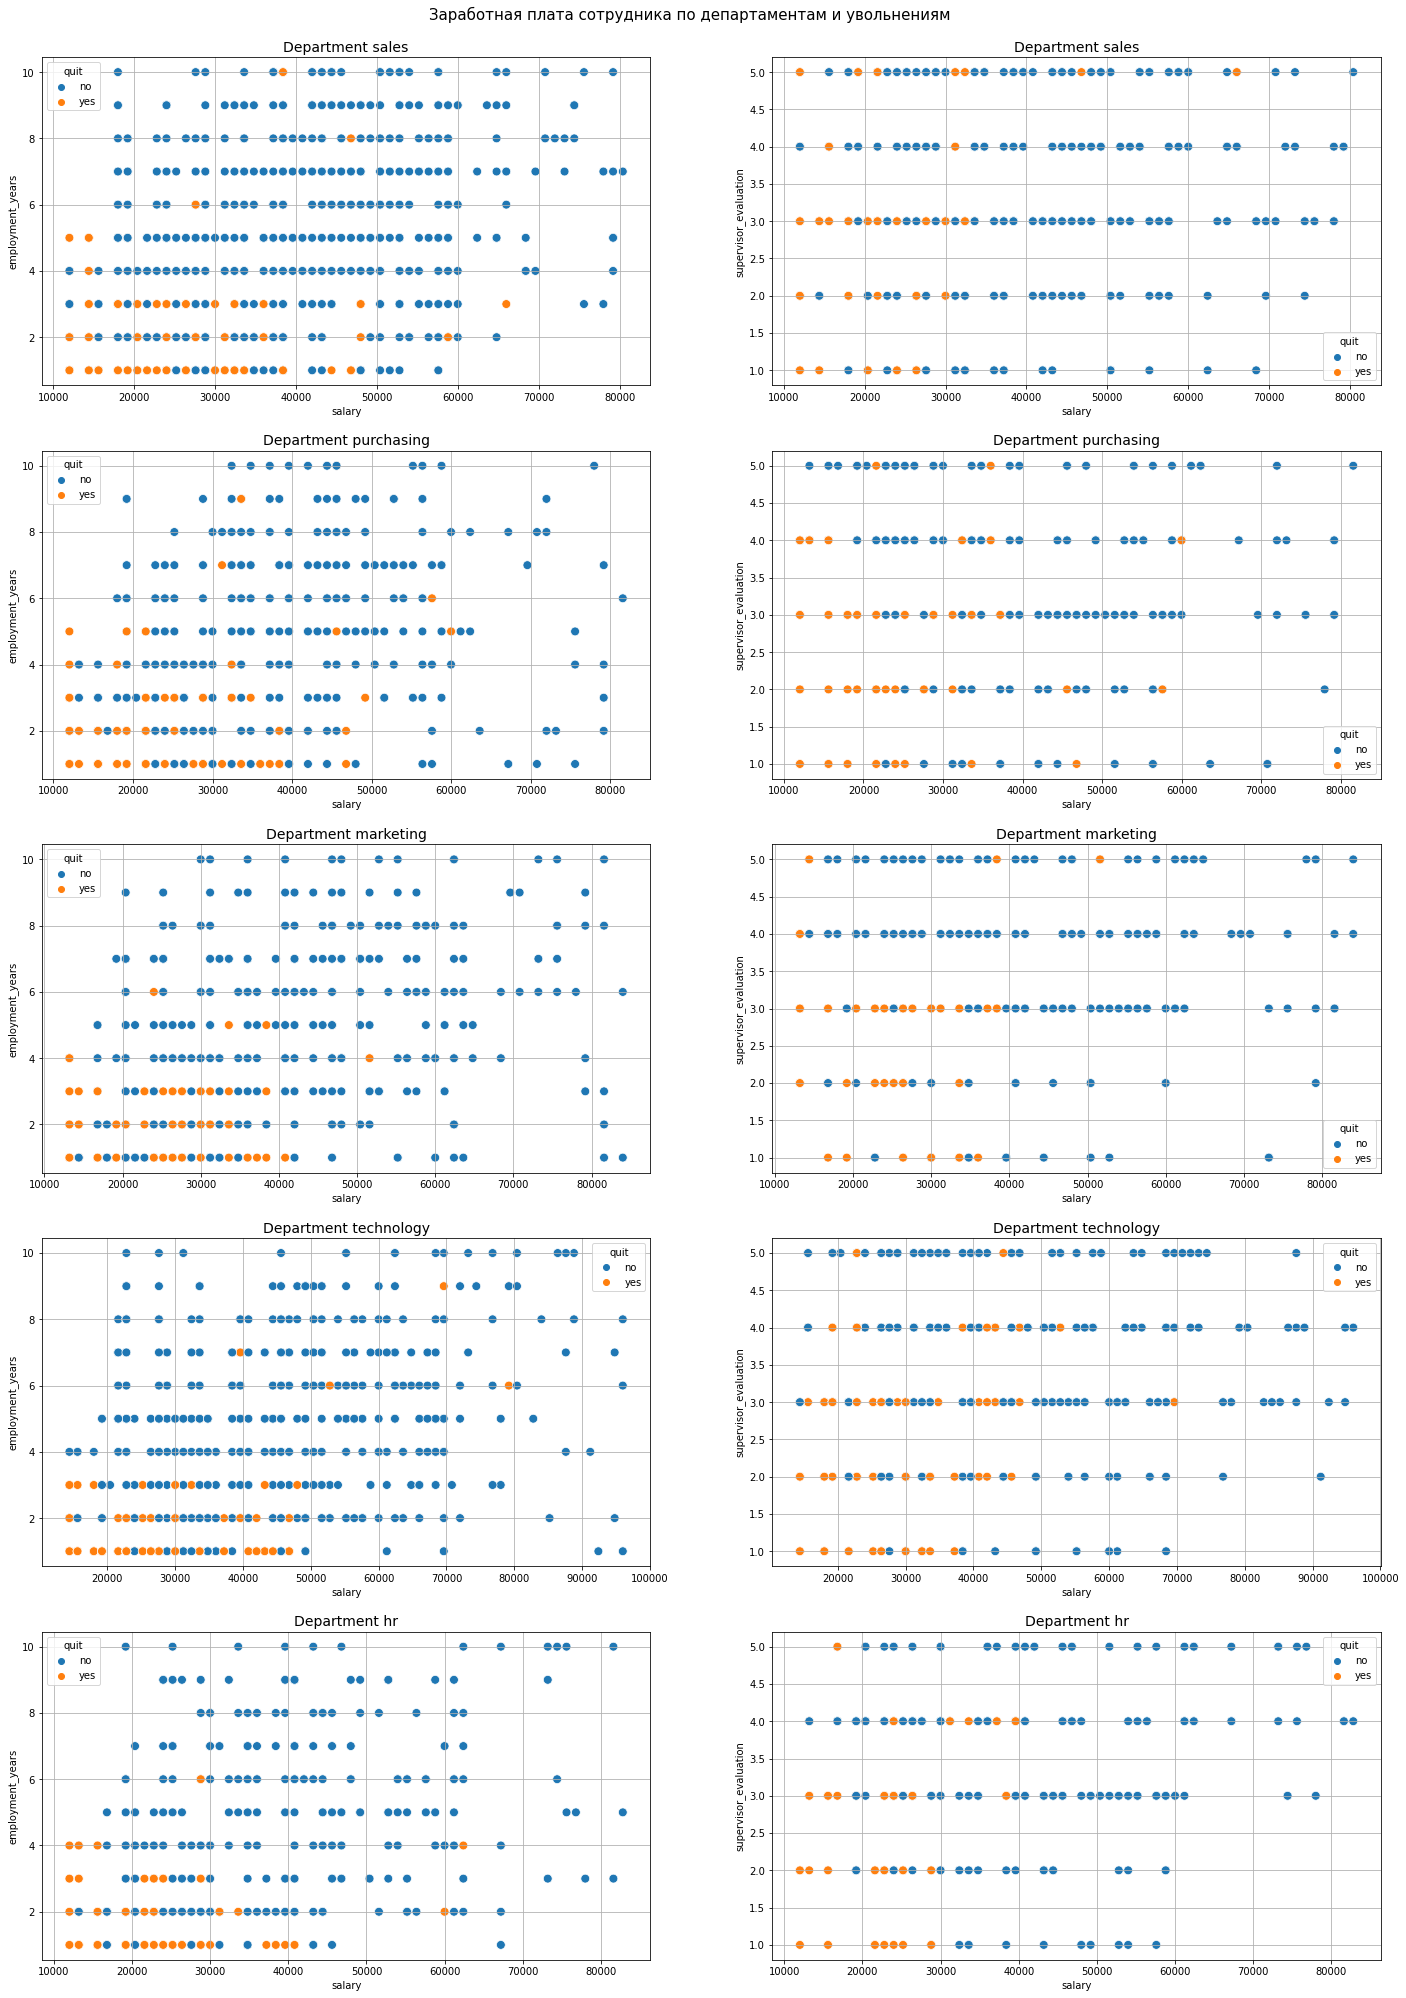

In [101]:
# Диаграмма рассеяния по отделам

fig, axs = plt.subplots(5, 2, figsize=(24, 35))

fig.suptitle(f"Заработная плата сотрудника по департаментам и увольнениям", size=15, y=0.9)

features = train_quit.drop(columns=['salary', 'id'], axis=1).select_dtypes(include='number').columns
departments = train_quit[~train_quit['dept'].isna()]['dept'].unique()
quit = train_quit['quit']

for j, item in enumerate(departments): 
    for i, feature in enumerate(features):
        sns.scatterplot(data=train_quit[train_quit['dept']==item], 
                        x='salary', y=feature, hue=quit, s=78, ax=axs[j][i])
        axs[j][i].set_title(f'Department {item}', fontsize=14)
        axs[j][i].set_ylabel(feature, fontsize=10)
        axs[j][i].grid(True)
        
plt.show();

Рассмотренные графики также подтверждают, что основной фактор увольнений - низкая зар.плата, низкая оценка от руководителя, отсутствие продвижений в последний год, и также продолжительность работы в компании.

In [102]:
# Объединим 2 целевых признака в новом файле

new_df = test_target_job_satisfaction_rate.merge(test_target_quit, on='id')

In [103]:
# Проверим число строк и заполненность

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
 2   quit                   2000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 62.5+ KB


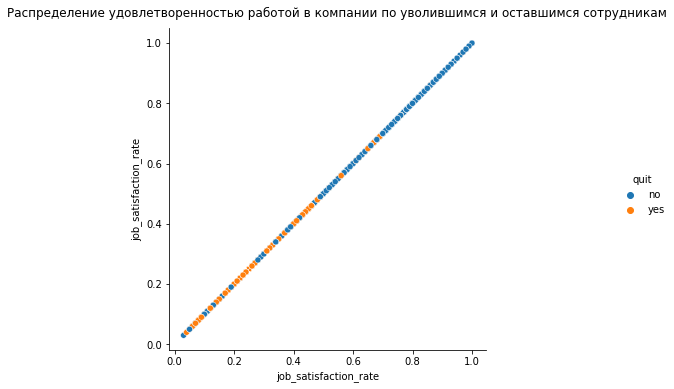

In [104]:
sns.relplot(data=new_df, x='job_satisfaction_rate', y='job_satisfaction_rate', hue='quit',
                kind='scatter').fig.suptitle(
    f'Распределение удовлетворенностью работой в компании по уволившимся и оставшимся сотрудникам', y=1.03);

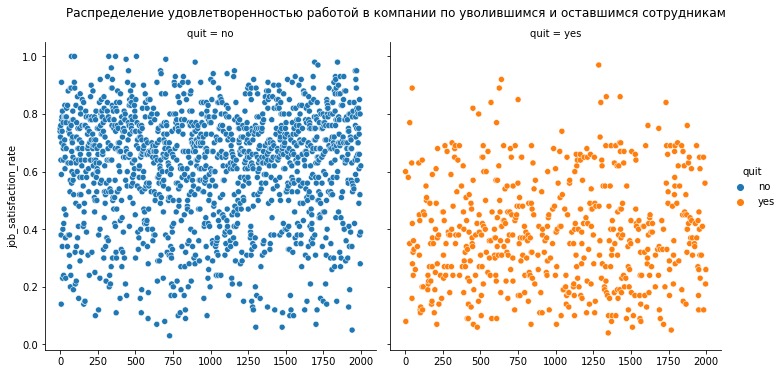

In [105]:
# Построим диаграмму рассеяния
sns.relplot(data=new_df, x=new_df.index, y='job_satisfaction_rate', col='quit', hue='quit', 
                kind='scatter').fig.suptitle(
    f'Распределение удовлетворенностью работой в компании по уволившимся и оставшимся сотрудникам', y=1.03);

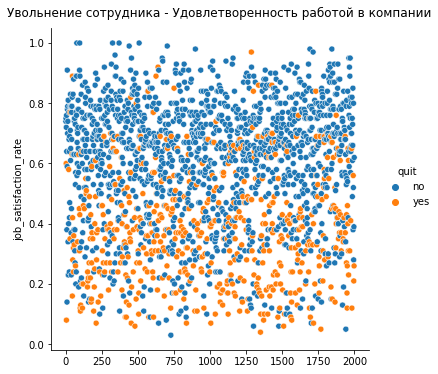

In [106]:
# На одном графике для сопоставления данных

sns.relplot(
    data=new_df, x=new_df.index, y='job_satisfaction_rate', kind='scatter', hue='quit'
).fig.suptitle(f'Увольнение сотрудника - Удовлетворенность работой в компании', y=1.03);

Сотрудники со степенью удовлетворенности работой до 0,5 в основном уволились, до 0,7 есть редкие случаи увольнений, при значении от 0,7 и выше - сотрудники не увольняются.

In [107]:
# Рассчитаем среднюю удовлетворенность работой в компании для уволившихся и оставшихся

p_2 = new_df.pivot_table(index='quit', columns = 'quit', values='job_satisfaction_rate', aggfunc=['mean'])

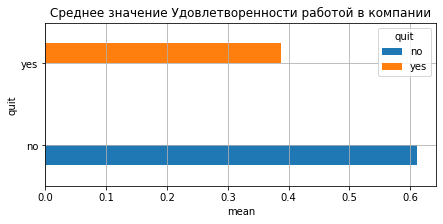

In [108]:
p_2.plot(title='Среднее значение Удовлетворенности работой в компании', y='mean', kind='barh', figsize=(7,3), grid=True)
plt.xlabel('mean');

#### Корреляционный анализ

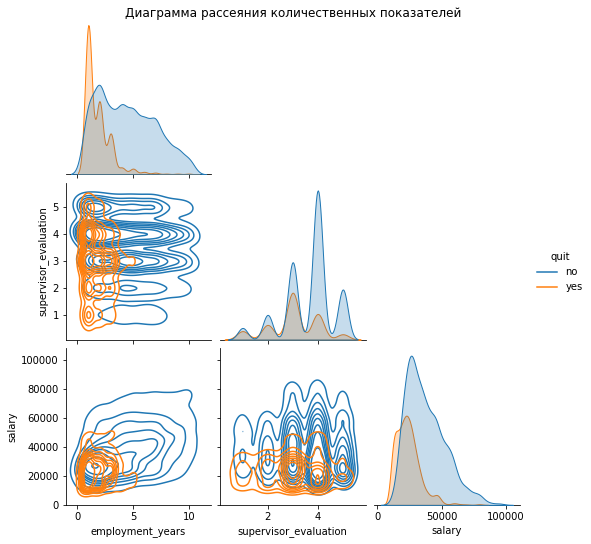

In [109]:
# Диаграмма рассеяния количественных показателей

pair_plot = sns.pairplot(train_quit.drop('id', axis=1), corner=True, kind="kde", hue = 'quit')
                         
pair_plot.fig.suptitle('Диаграмма рассеяния количественных показателей', y=1)
plt.show();    

Наиболее похожа на линейную зависимость зарплаты и времени работы в компании.

У сотрудники с зарплатой до 40 000 и временем работы в компании до 4-х лет намного выше число увольнений.

Рассмотрим матрицы корреляции с коээфициентами Спирмана и Фи

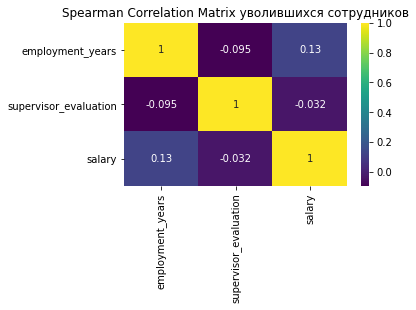

In [110]:
# Матрица корреляции числовых признаков Спирмана для уволившихся сотрудников

fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(train_quit_yes.drop('id', axis=1).corr(method='spearman'), annot=True, cmap='viridis')
plt.title('Spearman Correlation Matrix уволившихся сотрудников');

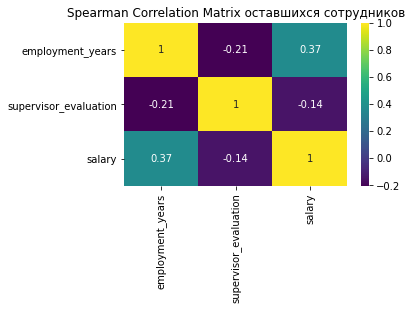

In [111]:
# Матрица корреляции числовых признаков Спирмана для оставшихся сотрудников

fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(train_quit_no.drop('id', axis=1).corr(method='spearman'), annot=True, cmap='viridis')
plt.title('Spearman Correlation Matrix оставшихся сотрудников');

Линейная корреляция ниже средней есть между зарплатой и временем работы в компании - для оставшихся сотрудников.

По уволившимся - явной коррекляции числовых признаков не отмечено.

In [112]:
# Определим непрерывные признаки для корреляции Фи

interval_columns = ['salary']

Not enough unique value for variable quit for analysis 1. Dropping this column


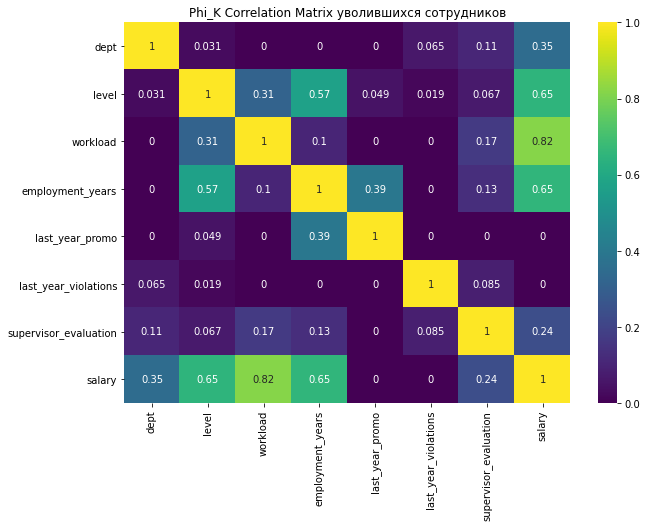

In [113]:
# Матрица корреляции Фи по уволившимся сотрудникам

fig, ax = plt.subplots(figsize=(10, 7))

sns.heatmap(train_quit_yes.drop('id', axis=1).phik_matrix(interval_cols=interval_columns, verbose=False), annot=True, cmap='viridis')

plt.title('Phi_K Correlation Matrix уволившихся сотрудников');

Для уволившихся сотрудников выявлена максимальная корреляция между зарплатой и уровнем загрузки, выше среднего: уровнем занимаемой должности и временем работы в компании. Ниже среднего - с отделом,  в котором работает сотрудник.
Также корреляция между временем работы в компании и продвижением за последний год.

Not enough unique value for variable quit for analysis 1. Dropping this column


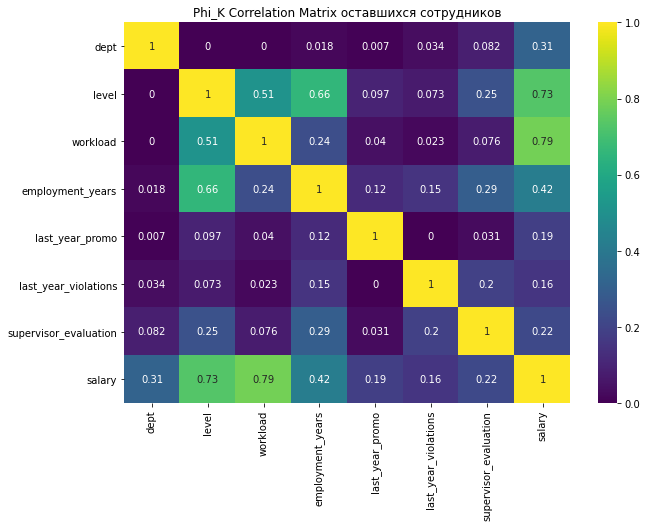

In [114]:
# Матрица корреляции Фи по оставшимся сотрудникам

fig, ax = plt.subplots(figsize=(10, 7))

sns.heatmap(train_quit_no.drop('id', axis=1).phik_matrix(interval_cols=interval_columns, verbose=False), annot=True, cmap='viridis')

plt.title('Phi_K Correlation Matrix оставшихся сотрудников');

Для оставшихся сотрудников отмечена аналогичная корреляция признаков, но с более низкими значениями коэффициентов.
Вместо продвижений за последний год, здесь отмечена корреляция между оценкой от руководителя и временем работы в компании, а также уровнем занимаемой должности.

Мультиколлинеарность в обоих случаях отсутствует.

**Вывод:**

Увольняющиеся сотрудники в среднем работют в компании 1,8 лет, 75% уволившихся работали до 2 лет. 
Основная часть увольняется в первый год работы, примерно половина от этого числа - во 2й, и примерно треть - в 3й.

Их средняя заработная плата составляет 23 885 , Медианная = 22 800, у 75% - до 27 600. В целом зарплата примерно на треть меньше, чем у оставшихся. Значение выше 43 000 скорее не типичны (относятся к выбросам).
Средняя оценка их работы со стороны руководителя = 3,046, 50% имеют оценку 3.

Распределение сотрудников по отделам соответствует в целом численности персонала, тут скорее нет взаимосвязи: наибольшее число сотрудников в отделе sales, наименьшее - в HR. Аналогично распределены сотрудники уволившиеся и оставшиеся.
Но количественно - это, конечно Sales.

Подавляющая часть увольняется с уровня Junior - примерно 85% уволившихся, небольшое число - с уровня Middle, и совсем незначительное - с уровня Senior. 

По степени загруженности уволившиеся сотрудники находятся на низком и чуть меньше - на среднем уровне. Намного ниже число увольнений с высоки уровнем загруженности.

Среди уволившихся сотрудников не было повышений за последний год.
Число нарушителей трудового договора за последний год примерно треть от не имевших нарушений. 

Сотрудники со степенью удовлетворенностью работой в компании ниже 0,5 в основном увольняются, 0,5-0,7 - редкие увольнения, от 0,7 - остаются в компании. 

****************
Среди имевших продвижение в последний год, увольнение единично. Среди не имевших продвижений: увольнялись люди со стажем до 3-х лет и зарплатой до 45 000, оценкой от руководителя до 4-х, 5 - редкие случаи.

Сотрудники с высоким уровнем загрузки, зарплатой до 50 000, стажем работы до 3-х лет увольняются при любых оценках со стороны руководителя.
Со средним уровнем загрузки, зарплатой до 30 000 и оценках руководителся до 3-х.
С низким уровнем загрузки, зарплатой до 38 000, оценками до 4-х, реже 5.

Практически все сотрудники, имевшие нарушение трудового договора в послдений год, с зарплатой до 40 000 и стажем до 3-х лет уволились. С оценкой от руководителя = 1 из названной группы - уволились все, с оценками 2-4 - примерно равное число, с оценкой 5 - небольшое количество сотрудников.
Среди не имевших нарушений трудового договора, зарплатой до 20 000 и оценкой от руководителя до 3-х - также практически все уволились.

В основном увольняются сотрудники  с зарплатой до 40 000 и стажем до 3-х лет - по всем отделам. В отделе Technology - с зарплатой до 50 000.
****************
В целевом признаке можно отметить дисбаланс классов 1:3 (уволились : остались).

Поскольку данные имеют существенные отличия в масштабах (тысячи и доли единицы), их следует масштабировать. В данных также есть категориальные колонки, которые следует закодировать, для оптимизации работы моделей МО.

Уровень удовлетворенности сотрудников работой в компании в большей степени зависит от оценки со стороны руководителя и времени работы в компании. 

Про оценке от руководителя 1-2 степень удовлетворенности работой составляет до 0,6, при оценке = 3 - до 0,7-0,8.
При оценке от руководителя 4-5 степень удовтелворенности работой в компании от 0,4 до 1.

Любопытно, что даже уровень заработной платы так сильно не влияет на рассматриваемый показатель.

На втором месте время работы в компании: при увеличении этого показателя в целевом признаке становится все меньше низких значений.

По уровню загрузки, уровню занимаемой должности, отделу зависимости с удовлетворенностью работы в компании практически нет.

При наличии продвижений в последний год значения целевого признака выше. И наоборот, при нарушениях трудового договора в последний год, удовлетворенность работой в компании принимает минимальные значения (но здесь причина и следствие не понятны).

Отмечена корреляция заработной платы с уровнем загрузки и уровнем занимаемой должности.

## Задание 1: Шаг 4. Подготовка данных - pipeline

В данном случае мы имеем дело с мультиклассовой классификацией.

Целевой признак, И признаки, которые следует исключить из выборки совпадают.

In [115]:
# Определим целевой признак и признаки, которые нужно исключить из выборки

target = 'job_satisfaction_rate'
drop_columns = ['job_satisfaction_rate']

In [116]:
# Объединим данные, чтобы индексы совпали

total = test_features.merge(test_target_job_satisfaction_rate, on='id').set_index('id')
total

dept   level workload  employment_years last_year_promo  \
id                                                                      
485046   marketing  junior   medium                 2              no   
686555          hr  junior   medium                 1              no   
467458       sales  middle      low                 5              no   
418655       sales  middle      low                 6              no   
789145          hr  middle   medium                 5              no   
...            ...     ...      ...               ...             ...   
393147   marketing  junior      low                 3              no   
109582  technology  middle      low                 3              no   
305653  technology  junior      low                 1              no   
160233  technology  middle      low                 8              no   
771859  purchasing  middle   medium                 1              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
485046                   no                      5   28800   
686555                   no                      4   30000   
467458                   no                      4   19200   
418655                   no                      4   19200   
789145                   no                      5   40800   
...                     ...                    ...     ...   
393147                   no                      3   20400   
109582                   no                      2   21600   
305653                   no                      3   14400   
160233                   no                      1   32400   
771859                   no                      4   38400   

        job_satisfaction_rate  
id                             
485046                  0.790  
686555                  0.720  
467458                  0.640  
418655                  0.600  
789145                  0.750  
...                       ...  
393147                  0.560  
109582                  0.140  
305653                  0.110  
160233                  0.430  
771859                  0.670  

[2000 rows x 9 columns]

In [117]:
train_job_satisfaction_rate = train_job_satisfaction_rate.set_index('id')

In [118]:
# разбиваем на выборки

X_train = train_job_satisfaction_rate.drop(columns=drop_columns, axis=1)
X_test = total.drop(columns=drop_columns, axis=1)

y_train = train_job_satisfaction_rate['job_satisfaction_rate']
y_test = total['job_satisfaction_rate']

In [119]:
#Проверим размер выборок

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4000, 8) (4000,) (2000, 8) (2000,)


Перейдем к пайплайну.

Для начала определим три типа колонок для кодировщиков: категориальные номинальные, категориальные порядковые и числовые.

In [120]:
# Посмотрим, какие числовые колонки отберет селектор:

num_code_cols = X_train.select_dtypes(include='number').columns
num_code_cols

Index(['employment_years', 'supervisor_evaluation', 'salary'], dtype='object')

In [121]:
# Категориальные:

X_train.select_dtypes(exclude='number').columns

Index(['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations'], dtype='object')

In [122]:
# Создадим список номинальных категориальных признаков

cat_ohe_cols = ['dept', 'last_year_promo', 'last_year_violations']

In [123]:
# Создадим список ранговых категориальных признаков и категории

cat_ord_cols = ['level', 'workload']
categories = [['junior', 'middle', 'senior'], ['low', 'medium', 'high']]

Добавляем кодирование качественных номинальных признаков спомощью OneHotEncoder. Пропуски заполняем самым частым значением с помощью SimleImputer.

In [124]:
# SimpleImputer + OHE

ohe_pipe = Pipeline([('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),\
                     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))]) 

Добавляем кодирование качественных порядковых признаков с помощью OrdinalEncoder. Пропуски до и после кодирования также заполняем самым частым значением с помощью SimleImputer.

In [125]:
# SimpleImputer + ORD + SimpleImputer
# categories : alphabetically

ord_pipe = Pipeline([('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                     ('ord', OrdinalEncoder(categories=categories,
                                            handle_unknown='use_encoded_value', unknown_value=np.nan)),
                     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))]) 

Объединим кодирование и масштабирование - ohe_pipe, ord_pipe, в пайплайн с подготовкой данных = data_preprocessor.

In [126]:
# Создаем пайплайн для обработки данных

data_preprocessor = ColumnTransformer([('ohe', ohe_pipe, cat_ohe_cols),
                                       ('ord', ord_pipe, cat_ord_cols),
                                       ('num', StandardScaler(), num_code_cols)],
                                      remainder='passthrough') 

Создадим итоговый пайплайн подготовки данных и обучения модели.

В качестве линейной модели возьмем Линейную регрессию. В качестве отправной точки.

In [127]:
# Итоговый пайплайн: подготовка данных и модель (возьмем пока что Логистическую Регрессию)

pipe_final = Pipeline([('preprocessor', data_preprocessor),
                       ('models', LinearRegression())]) 

## Задание 1: Шаг 5. Обучение моделей

### Линейная регрессия 1

Итак, у нас непрерывный целевой признак, поэтому для первой модели возьмем Логистическую регрессию и обучим на исходных данных (без преобразований).

Создадим свою метрику: SMAPE (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»)

In [128]:
# создаём функцию для оценки качества модели

def smape_metric(y_true, y_pred):
    
    metric = (100/len(y_true))*sum(abs(y_true - y_pred)*2 / (abs(y_true)+abs(y_pred)))
    
    return metric

# создаём пользовательскую метрику

smape_score = make_scorer(smape_metric, greater_is_better = False 
                           # В этом случае она получается все время отрицательной.
                          )

In [129]:
param_grid = {}

pf_lr = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring = smape_score, 
    random_state=RANDOM_STATE, 
    n_jobs=-1,
    #refit='smape_score'
)
pf_lr.fit(X_train, y_train) 

#print(f'Лучшая модель и ее параметры: \n\n', randomized_search.best_params_, '\n\n')
print(f'Метрика лучшей модели при кросс-валидации: ', -pf_lr.best_score_)

#print(f'Метрика на тестовой выборке: {-smape_score(randomized_search.best_estimator_, X_test,  y_test)}')

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.


Метрика лучшей модели при кросс-валидации:  25.028454946207088


В нашем задании критерий метрики smape определен как <=15.

Рассчитанная метрика превышает допустимое значение, модель следует улучшать.

### Дерево решений

In [130]:
# Рассмотрим модель Дерево решений

pipe_final_dt = Pipeline([('preprocessor', data_preprocessor),
                       ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))]) 

In [131]:
# Обучим модель

pipe_final_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befor...
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'senior'],
                                                                                              ['low',
                                                                                               'medium',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', StandardScaler(),
                                                  Index(['employment_years', 'supervisor_evaluation', 'salary'], dtype='object'))])),
                ('models', DecisionTreeRegressor(random_state=42))])

In [132]:
param_grid = {}

pf_dt = RandomizedSearchCV(
    pipe_final_dt, 
    param_grid, 
    cv=5,
    scoring = smape_score, 
    random_state=RANDOM_STATE, 
    n_jobs=-1,
    #refit='smape_score'
)
pf_dt.fit(X_train, y_train) 

#print(f'Лучшая модель и ее параметры: \n\n', pf_dt.best_params_, '\n\n')
print(f'Метрика лучшей модели при кросс-валидации: ', -pf_dt.best_score_)

#print(f'Метрика на тестовой выборке: {-smape_score(randomized_search.best_estimator_, X_test,  y_test)}')

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.


Метрика лучшей модели при кросс-валидации:  15.246058703282628


### Подбор гиперпараметров

Перейдем к подбору параметров и лучшей модели.

Зафиксируем гиперпараметры для поиска лучшей модели

In [133]:
# Зададим гиперпараметры пайплайна

param_grid = [
    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE, 
                                         #max_depth = 5, max_features=2
                                        )],
        'models__max_depth': range(1, 35),
        'models__min_samples_leaf': range(1, 4),
        #'models__min_samples_split': range(2, 3),
        'models__max_features': range(1, 15),
        #'models__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
   # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],     
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    # словарь для модели RandomForestRegressor() 
    { 
        'models': [RandomForestRegressor(random_state=RANDOM_STATE, 
                                         #max_depth = 5, max_features=2 
                                        )], 
        'models__max_depth': range(1, 50), 
        #'models__min_samples_leaf': range(1, 4), 
        #'models__min_samples_split': range(2, 3), 
        'models__max_features': range(1, 7), 
        'models__n_estimators': range(1, 150), 
        #'models__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

Подберем лучшую модель с помощью RandomizedSearchCV. Это будет относительно быстро, но варианты не все будут рассмотрены.

In [134]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring = smape_score, 
    random_state=RANDOM_STATE, 
    n_jobs=-1,
    refit='smape_score'
)
randomized_search.fit(X_train, y_train) 

print(f'Лучшая модель и ее параметры: \n\n', randomized_search.best_params_, '\n\n')
print(f'Метрика лучшей модели при кросс-валидации: ', -randomized_search.best_score_)

print(f'Метрика на тестовой выборке: {-smape_score(randomized_search.best_estimator_, X_test,  y_test)}')

Лучшая модель и ее параметры: 

 {'preprocessor__num': MinMaxScaler(), 'models__n_estimators': 126, 'models__max_features': 5, 'models__max_depth': 37, 'models': RandomForestRegressor(random_state=42)} 


Метрика лучшей модели при кросс-валидации:  13.205070345995761
Метрика на тестовой выборке: 12.42637318671814


Отлично, результат соответствует условию (<=15)

In [135]:
X_test.head()

dept   level workload  employment_years last_year_promo  \
id                                                                     
485046  marketing  junior   medium                 2              no   
686555         hr  junior   medium                 1              no   
467458      sales  middle      low                 5              no   
418655      sales  middle      low                 6              no   
789145         hr  middle   medium                 5              no   

       last_year_violations  supervisor_evaluation  salary  
id                                                          
485046                   no                      5   28800  
686555                   no                      4   30000  
467458                   no                      4   19200  
418655                   no                      4   19200  
789145                   no                      5   40800

In [136]:
# Создадим файл с предсказанным признаком (на всякий случай)

df_pred = pd.DataFrame({'id':X_test.index, 'job_satisfaction_rate':randomized_search.best_estimator_.predict(X_test)})

In [137]:
# Проверим

df_pred

id  job_satisfaction_rate
0     485046                  0.866
1     686555                  0.684
2     467458                  0.657
3     418655                  0.656
4     789145                  0.772
...      ...                    ...
1995  393147                  0.499
1996  109582                  0.154
1997  305653                  0.224
1998  160233                  0.503
1999  771859                  0.614

[2000 rows x 2 columns]

In [138]:
# Информация о новом файле

df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


## Задание 1: Шаг 6. Выводы

Целевой признак в данном случае непрерывный, поэтому для МО обучения выбраны модели линейной регрессии: LinearRegression, DescisionTreeRegressor, RandomForestRegressor.

Для подготовки данных (масштабирование, кодирование, заполнение пропусков) использован pipeline.

Лучшая модель подбиралась с помощью RandomizedSearchCV. В итоге лучшей моделью стал RandomForestRegressor. На тренировочной и  тестовой выборке метрика SMAPE составила меньше 15, что соответствует условию задания (<=15). 

Линейная регрессия не всегда может четко разделить признаки с оптимальной точностью, если связь между входными и целевым признаком не является строго линейной. В нашем случае это именно так (что показывает анализ данных и матрицы корреляции).

Дерево решений в этом случае может стать более эффективной моделью, тк решения о разделении данных принимаются в каждом узле. Строится довольно быстро. В случае регрессии размеры дерева будут больше, чем при классификации, чтобы получить оптимальные результаты (что логично, учитывая особенности целевого признака). Однако, на дерево решений могут сильно влиять выбросы в данных. В нашем случае выбросы есть. 

С этой проблемой помогает справляться случайный лес, который представляет собой набор отдельных деревьев решений. 
Это более эффективная модель, которая показывает более точные прогнозы. Случайный лес устойчив к переобучению и более робустный, т.е. устойчив к выбросам.
Хотя алгоритм требует большего времени, тк строится заданное число деревьев и из них выбирается оптимальное, и результат сложно визуализировать, тк результат - это усредненные данные отдельных наборов решений.

## Задание 2: Шаг 4. Добавление нового входного признака

In [139]:
# Добавим новый признак к тестовым данным задания 2

test_features = test_features.merge(test_target_job_satisfaction_rate, on='id')

In [140]:
# Проверим

test_features.head()

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      5   28800                  0.790  
1                   no                      4   30000                  0.720  
2                   no                      4   19200                  0.640  
3                   no                      4   19200                  0.600  
4                   no                      5   40800                  0.750

In [141]:
# Проверим

test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   1997 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               1999 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   int64  
 9   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 171.9+ KB


Перейдем к тренировочным данным задания 2.

In [142]:
# Добавим индекс, как признак в тренировочные данные задания 1

train_job_satisfaction_rate['id'] = train_job_satisfaction_rate.index

In [143]:
# Создадим новый вспомогательный файл с признаком job_satisfaction_rate из тренировочных данных первого задания

feature = train_job_satisfaction_rate[['job_satisfaction_rate']]

In [144]:
# Проверим

feature

job_satisfaction_rate
id                           
155278                  0.580
653870                  0.760
184592                  0.110
171431                  0.370
693419                  0.200
...                       ...
457950                  0.450
957499                  0.680
533318                  0.760
706868                  0.480
338347                  0.180

[4000 rows x 1 columns]

In [145]:
# Попробуем добавить новый признак в тренировочные данные 2го задания

new_df = train_quit.merge(feature, on='id')
new_df

Empty DataFrame
Columns: [id, dept, level, workload, employment_years, last_year_promo, last_year_violations, supervisor_evaluation, salary, quit, job_satisfaction_rate]
Index: []

id  сотрудников из задания 2 не совпадают с id сотрудников из задания 1.
Поэтому, чтобы добавить нужный нам признак, воспользуемся предсказанием модели из задания 1. Применим модель к тренировочному файлу задания 2.

In [146]:
# Получим предскзаание, создадим новый дата фрейм с учетом id

df_pred = pd.DataFrame(
    {'id':train_quit['id'], 'job_satisfaction_rate':randomized_search.best_estimator_.predict(
        train_quit.drop(columns=['id','quit'], axis=1))})

In [147]:
# Проверим результат

df_pred

id  job_satisfaction_rate
0     723290                  0.623
1     814010                  0.826
2     155091                  0.390
3     257132                  0.357
4     910140                  0.737
...      ...                    ...
3995  588809                  0.534
3996  672059                  0.849
3997  536432                  0.581
3998  692133                  0.551
3999  853842                  0.521

[4000 rows x 2 columns]

In [148]:
# Добавим новый признак в тренировочный файл задания 2

train_quit = train_quit.merge(df_pred, on='id')

In [149]:
# Проверим результат

train_quit

id        dept   level workload  employment_years last_year_promo  \
0     723290       sales  middle     high                 2              no   
1     814010       sales  junior   medium                 2              no   
2     155091  purchasing  middle   medium                 5              no   
3     257132       sales  junior   medium                 2              no   
4     910140   marketing  junior   medium                 2              no   
...      ...         ...     ...      ...               ...             ...   
3995  588809       sales  junior   medium                 4              no   
3996  672059       sales  middle     high                 9              no   
3997  536432  purchasing  junior      low                 2              no   
3998  692133  purchasing  middle   medium                 2              no   
3999  853842       sales  junior   medium                 2              no   

     last_year_violations  supervisor_evaluation  salary quit  \
0                      no                      4   54000   no   
1                      no                      4   27600   no   
2                      no                      1   37200   no   
3                     yes                      3   24000  yes   
4                      no                      5   25200   no   
...                   ...                    ...     ...  ...   
3995                   no                      3   26400   no   
3996                   no                      4   52800   no   
3997                  yes                      4   12000  yes   
3998                   no                      4   33600   no   
3999                   no                      3   27600  yes   

      job_satisfaction_rate  
0                     0.623  
1                     0.826  
2                     0.390  
3                     0.357  
4                     0.737  
...                     ...  
3995                  0.534  
3996                  0.849  
3997                  0.581  
3998                  0.551  
3999                  0.521  

[4000 rows x 11 columns]

Все получилось, размер файла корректный, новый признак добавлен.

## Задание 2: Шаг 5. Подготовка данных - pipeline

Для начала посмотрим, есть ли дисбаланс классов в целевом признаке.

In [150]:
# В % от обещго числа наблюдейний

train_quit['quit'].value_counts(normalize=True)

no    0.718
yes   0.282
Name: quit, dtype: float64

Класс yes составляет примерно треть от общего числа данных, no - примерно 2/3.

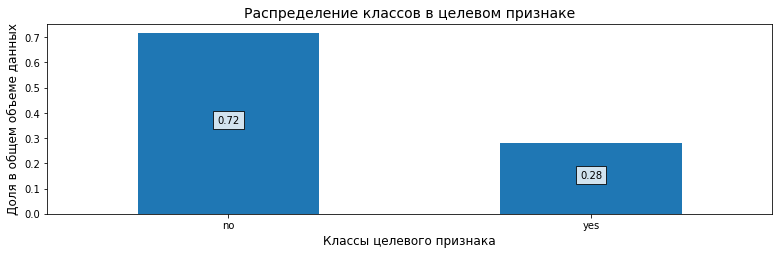

In [151]:
# Посмотрим это на графике:

fig, axs = plt.subplots( figsize=(13,3.5))
train_quit['quit'].value_counts(normalize=True).plot(kind='bar',  rot=0)
plot_lables('Распределение классов в целевом признаке','Классы целевого признака' ,'Доля в общем объеме данных' )

for i in range(train_quit['quit'].nunique()):
        plt.text(i, train_quit['quit'].value_counts(normalize=True)[i]/2, 
                 round(train_quit['quit'].value_counts(normalize=True)[i],2), ha = 'center', 
                 bbox = dict(facecolor = 'white', alpha =0.8))     

plt.show();

В модели будем применять взвешивание классов, для корректировки дисбаланса. 
В нашем случае, это особенность данных: уволившихся сотрудников меньше, чем оставшихся работать в компании, тут нет ошибки.

In [152]:
# Определим целевой признак и признаки, которые нужно исключить из выборки

target = 'quit'
drop_columns = ['quit', 'id']

In [153]:
# Объединим данные, чтобы индексы совпали

total_2 = test_features.merge(test_target_quit, on='id')

In [154]:
# Проверим

total_2

id        dept   level workload  employment_years last_year_promo  \
0     485046   marketing  junior   medium                 2              no   
1     686555          hr  junior   medium                 1              no   
2     467458       sales  middle      low                 5              no   
3     418655       sales  middle      low                 6              no   
4     789145          hr  middle   medium                 5              no   
...      ...         ...     ...      ...               ...             ...   
1995  393147   marketing  junior      low                 3              no   
1996  109582  technology  middle      low                 3              no   
1997  305653  technology  junior      low                 1              no   
1998  160233  technology  middle      low                 8              no   
1999  771859  purchasing  middle   medium                 1              no   

     last_year_violations  supervisor_evaluation  salary  \
0                      no                      5   28800   
1                      no                      4   30000   
2                      no                      4   19200   
3                      no                      4   19200   
4                      no                      5   40800   
...                   ...                    ...     ...   
1995                   no                      3   20400   
1996                   no                      2   21600   
1997                   no                      3   14400   
1998                   no                      1   32400   
1999                   no                      4   38400   

      job_satisfaction_rate quit  
0                     0.790   no  
1                     0.720   no  
2                     0.640   no  
3                     0.600   no  
4                     0.750   no  
...                     ...  ...  
1995                  0.560  yes  
1996                  0.140  yes  
1997                  0.110  yes  
1998                  0.430   no  
1999                  0.670   no  

[2000 rows x 11 columns]

In [155]:
# разбиваем на выборки

X_train = train_quit.drop(columns=drop_columns, axis=1)
X_test = total_2.drop(columns=drop_columns, axis=1)

y_train = train_quit['quit']
y_test = total_2['quit']

In [156]:
#Проверим размер выборок

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4000, 9) (4000,) (2000, 9) (2000,)


In [157]:
# Закодируем целевой признак

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [158]:
label_encoder.classes_

array(['no', 'yes'], dtype=object)

Зафиксируем: оставшиеся сотрдуники - код 0, уволившиеся - код 1.

Перейдем к пайплайну.

Для начала определим три типа колонок для кодировщиков: категориальные номинальные, категориальные порядковые и числовые.

In [159]:
# Посмотрим, какие числовые колонки отберет селектор:

num_code_cols = X_train.select_dtypes(include='number').columns
num_code_cols

Index(['employment_years', 'supervisor_evaluation', 'salary',
       'job_satisfaction_rate'],
      dtype='object')

In [160]:
# Категориальные:

X_train.select_dtypes(exclude='number').columns

Index(['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations'], dtype='object')

In [161]:
# Создадим список номинальных категориальных признаков

cat_ohe_cols = ['dept', 'last_year_promo', 'last_year_violations']

In [162]:
# Создадим список ранговых категориальных признаков и категории

cat_ord_cols = ['level', 'workload']
categories = [['junior', 'middle', 'senior'], ['low', 'medium', 'high']]

Добавляем кодирование качественных номинальных признаков спомощью OneHotEncoder. Пропуски заполняем самым частым значением с помощью SimleImputer.

In [163]:
# SimpleImputer + OHE

ohe_pipe = Pipeline([('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),\
                     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))]) 

Добавляем кодирование качественных порядковых признаков с помощью OrdinalEncoder. Пропуски до и после кодирования также заполняем самым частым значением с помощью SimleImputer.

In [164]:
# SimpleImputer + ORD + SimpleImputer
# categories : alphabetically

ord_pipe = Pipeline([('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                     ('ord', OrdinalEncoder(categories=categories,
                                            handle_unknown='use_encoded_value', unknown_value=np.nan)),
                     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))]) 

Объединим кодирование и масштабирование - ohe_pipe, ord_pipe, в пайплайн с подготовкой данных = data_preprocessor.

In [165]:
# Создаем пайплайн для обработки данных

data_preprocessor = ColumnTransformer([('ohe', ohe_pipe, cat_ohe_cols),
                                       ('ord', ord_pipe, cat_ord_cols),
                                       ('num', StandardScaler(), num_code_cols)],
                                      remainder='passthrough') 

Создадим итоговый пайплайн подготовки данных и обучения модели.

В качестве первой модели возьмем Логистическую регрессию.

In [166]:
# Итоговый пайплайн: подготовка данных и модель (возьмем пока что Логистическую Регрессию)

pipe_final_clf = Pipeline([('preprocessor', data_preprocessor),
                       ('models', LogisticRegression(random_state=RANDOM_STATE))]) 

## Задание 2: Шаг 6. Обучение модели

In [167]:
# Обучим первую модель

pipe_final_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befor...
                                                                                               'senior'],
                                                                                              ['low',
                                                                                               'medium',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', StandardScaler(),
                                                  Index(['employment_years', 'supervisor_evaluation', 'salary',
       'job_satisfaction_rate'],
      dtype='object'))])),
                ('models', LogisticRegression(random_state=42))])

In [168]:
param_grid = {}

pf_clf = RandomizedSearchCV(
    pipe_final_clf,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=RANDOM_STATE
)
pf_clf.fit(X_train, y_train)

#print(f'Лучшая модель и ее параметры: \n\n', pf_clf.best_params_, '\n\n')
print(f'Метрика лучшей модели при кросс-валидации: ', pf_clf.best_score_)

#print(f'Метрика на тестовой выборке: {-smape_score(randomized_search.best_estimator_, X_test,  y_test)}')

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.


Метрика лучшей модели при кросс-валидации:  0.9176969738591797


Довольно высокая метрика с самого начала.

Зафиксируем гиперпараметры для поиска лучшей модели

In [169]:
# Зададим гиперпараметры пайплайна

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE, 
                                          class_weight='balanced'
                                         )],
        'models__max_depth': range(1,30),
        'models__min_samples_leaf': range(1, 5),
        'models__min_samples_split': range(2, 15),
        'models__max_features': range(2, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1,15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, 
                       class_weight='balanced'
                      )],
        'models__kernel': ['linear', 'rbf', 'sigmoid'],
        #'models__degree': [0, 1, 2, 3, 4],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  

    },
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, max_iter=100,
                                      class_weight='balanced'
                                     )],     
        'models__solver': ['liblinear', 'saga'], 
        'models__penalty': ['l1'],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    }
]

Подберем лучшую модель с помощью RandomizedSearchCV. 

In [170]:
randomized_search = RandomizedSearchCV(
    pipe_final_clf, 
    param_grid, 
    cv=5,
    scoring = 'roc_auc', 
    random_state=RANDOM_STATE, 
    n_jobs=-1,
    refit='roc_auc'
)
randomized_search.fit(X_train, y_train) 


print(f'Лучшая модель и ее параметры: \n\n', randomized_search.best_params_, '\n\n')
print(f'Метрика лучшей модели при кросс-валидации: ', randomized_search.best_score_)

print(f'Метрика ROC-AUC на тестовой выборке:{roc_auc_score(y_test, randomized_search.best_estimator_.predict_proba(X_test)[:,1])}')

Лучшая модель и ее параметры: 

 {'preprocessor__num': RobustScaler(), 'models__min_samples_split': 5, 'models__min_samples_leaf': 4, 'models__max_features': 18, 'models__max_depth': 10, 'models': DecisionTreeClassifier(class_weight='balanced', random_state=42)} 


Метрика лучшей модели при кросс-валидации:  0.9192185475368962
Метрика ROC-AUC на тестовой выборке:0.9194595902724273


Зафиксируем результаты:

Метрика лучшей модели при кросс-валидации:  0.9204815431468996
Метрика ROC-AUC на тестовой выборке:0.9274846154605977

Метрики соответствуют условиям задания (>=92 на тестовых данных)

Сохраним на всякий случай предсказания модели

In [171]:
# Лучшая модель

clf_model = randomized_search.best_estimator_._final_estimator

In [172]:
# Вспомним состав тестового файла

X_test.head()

dept   level workload  employment_years last_year_promo  \
0  marketing  junior   medium                 2              no   
1         hr  junior   medium                 1              no   
2      sales  middle      low                 5              no   
3      sales  middle      low                 6              no   
4         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      5   28800                  0.790  
1                   no                      4   30000                  0.720  
2                   no                      4   19200                  0.640  
3                   no                      4   19200                  0.600  
4                   no                      5   40800                  0.750

In [173]:
# Вспомним состав исходного тестового файла

test_features.head()

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      5   28800                  0.790  
1                   no                      4   30000                  0.720  
2                   no                      4   19200                  0.640  
3                   no                      4   19200                  0.600  
4                   no                      5   40800                  0.750

In [174]:
# Создадим файл с предсказанным признаком (для Задания 2)

df_pred_2 = pd.DataFrame({'id':test_features.id, 'quit':randomized_search.best_estimator_.predict(X_test)})

In [175]:
df_pred_2

id  quit
0     485046     0
1     686555     0
2     467458     0
3     418655     0
4     789145     0
...      ...   ...
1995  393147     1
1996  109582     1
1997  305653     1
1998  160233     0
1999  771859     0

[2000 rows x 2 columns]

Выведем правила, сформированные деревом решений и рассмотрим, какие признаки оно использовало.

In [176]:
# Выведем уровни правил и признаки дерева решений

text_representation = export_text(
    clf_model,
    feature_names=list(pd.DataFrame(data_preprocessor.fit_transform(X_train), columns=data_preprocessor.get_feature_names_out()).columns),
    max_depth=10
)
print(text_representation) 

|--- ord__level <= 0.50
|   |--- num__job_satisfaction_rate <= 0.36
|   |   |--- num__job_satisfaction_rate <= -0.29
|   |   |   |--- num__employment_years <= 0.12
|   |   |   |   |--- ord__workload <= 0.50
|   |   |   |   |   |--- num__job_satisfaction_rate <= -1.23
|   |   |   |   |   |   |--- num__supervisor_evaluation <= -1.50
|   |   |   |   |   |   |   |--- num__job_satisfaction_rate <= -1.35
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- num__job_satisfaction_rate >  -1.35
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- num__supervisor_evaluation >  -1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- num__job_satisfaction_rate >  -1.23
|   |   |   |   |   |   |--- ohe__dept_technology <= 0.50
|   |   |   |   |   |   |   |--- num__employment_years <= -0.12
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- num__employment_years >  -0.12
|   |   |   |   |   |   |   |   |--- 

Схема довольно велика, т.к. глубина дерева 10 уровней. Но по ней можно понять, как дерево принимало решения.

### Feature Engineering 

Посмотрим, можно ли улулчшить модель, работая с признаками.

In [177]:
# Сохраним тренировочную выборку с закодированными колонками

X_train_pre = pd.DataFrame(data_preprocessor.fit_transform(X_train), columns=data_preprocessor.get_feature_names_out())
X_test_pre = pd.DataFrame(data_preprocessor.transform(X_test), columns=data_preprocessor.get_feature_names_out())

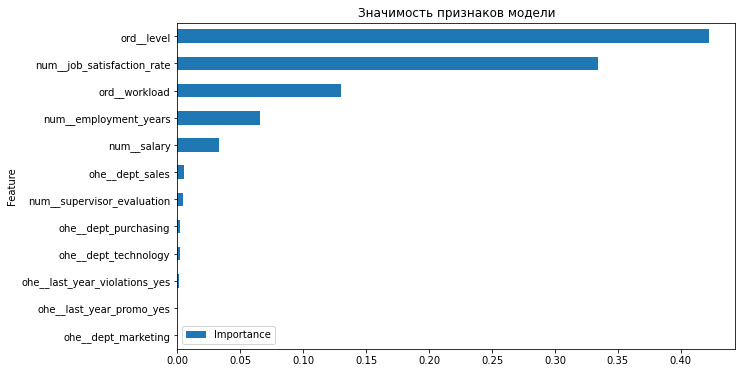

In [178]:
# Посмотрим на значимость признаков модели на графике

feature_importance = pd.DataFrame({'Feature': X_train_pre.columns, 'Importance': 
                                   np.abs(randomized_search.best_estimator_._final_estimator.feature_importances_)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title("Значимость признаков модели");

In [179]:
# Определим наименее важные признаки (значимость меньше 0,02)

features_to_drop = feature_importance[feature_importance['Importance'] < 0.02]['Feature'].to_list() 
features_to_drop

['ohe__dept_marketing',
 'ohe__last_year_promo_yes',
 'ohe__last_year_violations_yes',
 'ohe__dept_technology',
 'ohe__dept_purchasing',
 'num__supervisor_evaluation',
 'ohe__dept_sales']

In [180]:
# Удалим их из тренировочной и тестовой выборок

X_train_less_features = X_train_pre.drop(features_to_drop, axis=1)
X_test_less_features = X_test_pre.drop(features_to_drop, axis=1)

In [181]:
# Сохраним лучшую модель

clf_model_less_features = randomized_search.best_estimator_._final_estimator

In [182]:
# Обучим модель на данных, за вычетом наименее важных признаков

clf_model_less_features.fit(X_train_less_features, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=18,
                       min_samples_leaf=4, min_samples_split=5,
                       random_state=42)

In [183]:
# Получим предсказание модели для тестовой выборки

y_test_less_features_pred = clf_model_less_features.predict(X_test_less_features)

In [184]:
# Посчитаем метрику

print(f'Метрика ROC-AUC на тестовой выборке:{roc_auc_score(y_test, clf_model_less_features.predict_proba(X_test_less_features)[:,1])}')

Метрика ROC-AUC на тестовой выборке:0.9213122789861515


Мекрики немного ухудшились. Удалять признаки не стоит.

Применим селектор, посмотрим, что получится

In [185]:
# выбор селектора с 5 параметрами

selector = SelectKBest(f_classif, k=5)

# создание нового набора данных (два наиболее важных признака из выборки)

X_train_new = selector.fit_transform(X_train_pre, y_train)
X_test_new = selector.fit_transform(X_test_pre, y_test) 

In [186]:
# Сохраним лучшую модель

clf_model_selector = randomized_search.best_estimator_._final_estimator

In [187]:
clf_model_selector.fit(X_train_new, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=18,
                       min_samples_leaf=4, min_samples_split=5,
                       random_state=42)

In [188]:
# Посчитаем метрику

print(f'Метрика ROC-AUC на тестовой выборке:{roc_auc_score(y_test, clf_model_selector.predict_proba(X_test_new)[:,1])}')

Метрика ROC-AUC на тестовой выборке:0.8829824275469685


Метрика стала хуже. Не применяем этот метод

In [189]:
# Рассмотрим полиномизацию

poly = PolynomialFeatures(2)

X_train_poly = poly.fit_transform(X_train_pre)
X_test_poly = poly.transform(X_test_pre)

In [190]:
# Сохраним лучшую модель

clf_model_poly = randomized_search.best_estimator_._final_estimator

In [191]:
clf_model_poly.fit(X_train_poly, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=18,
                       min_samples_leaf=4, min_samples_split=5,
                       random_state=42)

In [192]:
# Посчитаем метрику

print(f'Метрика ROC-AUC на тестовой выборке:{roc_auc_score(y_test, clf_model_poly.predict_proba(X_test_poly)[:,1])}')

Метрика ROC-AUC на тестовой выборке:0.9195386119836424


Незначительно, но хуже метрика, по сравнению с базовой моделью.

Попробуем убрать наименее значимые признаки из полиномиальных

In [193]:
X_train_poly_df = pd.DataFrame(X_train_poly,columns = poly.get_feature_names_out())
X_test_poly_df = pd.DataFrame(X_test_poly,columns = poly.get_feature_names_out())

In [194]:
X_test_poly_df

1  ohe__dept_marketing  ohe__dept_purchasing  ohe__dept_sales  \
0    1.000                1.000                 0.000            0.000   
1    1.000                0.000                 0.000            0.000   
2    1.000                0.000                 0.000            1.000   
3    1.000                0.000                 0.000            1.000   
4    1.000                0.000                 0.000            0.000   
...    ...                  ...                   ...              ...   
1995 1.000                1.000                 0.000            0.000   
1996 1.000                0.000                 0.000            0.000   
1997 1.000                0.000                 0.000            0.000   
1998 1.000                0.000                 0.000            0.000   
1999 1.000                0.000                 1.000            0.000   

      ohe__dept_technology  ohe__last_year_promo_yes  \
0                    0.000                     0.000   
1                    0.000                     0.000   
2                    0.000                     0.000   
3                    0.000                     0.000   
4                    0.000                     0.000   
...                    ...                       ...   
1995                 0.000                     0.000   
1996                 1.000                     0.000   
1997                 1.000                     0.000   
1998                 1.000                     0.000   
1999                 0.000                     0.000   

      ohe__last_year_violations_yes  ord__level  ord__workload  \
0                             0.000       0.000          1.000   
1                             0.000       0.000          1.000   
2                             0.000       1.000          0.000   
3                             0.000       1.000          0.000   
4                             0.000       1.000          1.000   
...                             ...         ...            ...   
1995                          0.000       0.000          0.000   
1996                          0.000       1.000          0.000   
1997                          0.000       0.000          0.000   
1998                          0.000       1.000          0.000   
1999                          0.000       1.000          1.000   

      num__employment_years  num__supervisor_evaluation  num__salary  \
0                    -0.669                       1.519       -0.330   
1                    -1.063                       0.523       -0.251   
2                     0.511                       0.523       -0.964   
3                     0.904                       0.523       -0.964   
4                     0.511                       1.519        0.462   
...                     ...                         ...          ...   
1995                 -0.276                      -0.473       -0.885   
1996                 -0.276                      -1.469       -0.806   
1997                 -1.063                      -0.473       -1.281   
1998                  1.691                      -2.465       -0.093   
1999                 -1.063                       0.523        0.303   

      num__job_satisfaction_rate  ohe__dept_marketing^2  \
0                          1.187                  1.000   
1                          0.857                  0.000   
2                          0.480                  0.000   
3                          0.292                  0.000   
4                          0.999                  0.000   
...                          ...                    ...   
1995                       0.103                  1.000   
1996                      -1.878                  0.000   
1997                      -2.019                  0.000   
1998                      -0.510                  0.000   
1999                       0.622                  0.000   

      ohe__dept_marketing ohe__dept_purchasing  \
0                             

In [195]:
# Сохраним значимость признаков модели

feature_importance = pd.DataFrame({'Feature': X_test_poly_df.columns, 'Importance': 
                                   np.abs(clf_model_poly.feature_importances_)})

In [196]:
# Определим наименее важные признаки (значимость меньше 0,02)

features_to_drop = feature_importance[feature_importance['Importance'] < 0.015]['Feature'].to_list() 
features_to_drop

['1',
 'ohe__dept_marketing',
 'ohe__dept_purchasing',
 'ohe__dept_sales',
 'ohe__dept_technology',
 'ohe__last_year_promo_yes',
 'ohe__last_year_violations_yes',
 'ord__level',
 'num__employment_years',
 'num__salary',
 'num__job_satisfaction_rate',
 'ohe__dept_marketing^2',
 'ohe__dept_marketing ohe__dept_purchasing',
 'ohe__dept_marketing ohe__dept_sales',
 'ohe__dept_marketing ohe__dept_technology',
 'ohe__dept_marketing ohe__last_year_promo_yes',
 'ohe__dept_marketing ohe__last_year_violations_yes',
 'ohe__dept_marketing ord__level',
 'ohe__dept_marketing ord__workload',
 'ohe__dept_marketing num__employment_years',
 'ohe__dept_marketing num__supervisor_evaluation',
 'ohe__dept_marketing num__salary',
 'ohe__dept_marketing num__job_satisfaction_rate',
 'ohe__dept_purchasing^2',
 'ohe__dept_purchasing ohe__dept_sales',
 'ohe__dept_purchasing ohe__dept_technology',
 'ohe__dept_purchasing ohe__last_year_promo_yes',
 'ohe__dept_purchasing ohe__last_year_violations_yes',
 'ohe__dept_pu

In [197]:
# Удалим их из тренировочной и тестовой выборок

X_train_poly_less_features = X_train_poly_df.drop(features_to_drop, axis=1)
X_test_poly_less_features = X_test_poly_df.drop(features_to_drop, axis=1)

In [198]:
# Обучим модель на данных, за вычетом наименее важных признаков

clf_model_poly.fit(X_train_poly_less_features, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=18,
                       min_samples_leaf=4, min_samples_split=5,
                       random_state=42)

In [199]:
# Посчитаем метрику

print(f'Метрика ROC-AUC на тестовой выборке:{roc_auc_score(y_test, clf_model_poly.predict_proba(X_test_poly_less_features)[:,1])}')

Метрика ROC-AUC на тестовой выборке:0.9227636855726111


И это тоже не сработало.

**Вывод:**

Оставляем базовую модель, тк она показывает лучшую метрику.

Модель: DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=18,
                       min_samples_leaf=4, min_samples_split=5,
                       random_state=42)
Метрика ROC-AUC на тестовой выборке: 0.9274846154605977


## Задание 2: Шаг 7. Выводы

Целевой признак в данном случае бинарный, поэтому для МО обучения выбраны модели классификации: LogisticRegression, SVC, KNeighborsClassifier, DecisionTreeClassifier.

Для подготовки данных (масштабирование, кодирование, заполнение пропусков) использован pipeline.

Лучшая модель подбиралась с помощью RandomizedSearchCV. В итоге лучшей моделью стала DecisionTreeClassifier. На тренировочной и тестовой выборке метрика ROC-AUC составила больше 92, что соответствует условию задания (>=92).

Логистическая регрессия довольно чувствительна к выбросам. Подстраиваясь под все данные, она дает предсказания, смещенные в сторону выбросов. В нашем случае выбросы нельзя удалять - они часть данных. Модель не достаточно эффективна при нелинейных связах данных.

Метод опорных векторов более робастный, т.е. менее восприимчив к выбросам. Разграничивает классы гиперплоскостью (может строить и нелинейные границы), с максимальным зазором между отдельными наблюдениями. Применяется, когда данных немного и/или целевой признак не линейно связан с входными. Но при этом модель также относится к линейным, ее сложно интерпретировать и она может сильно подстраиваться под тренировочные данные. А этого хотелось бы избежать, потому что данных у нас не много.

Модель ближайших соседей может работать с данными и при наличии нелинейной зависимости. В процессе обучения она запоминает данные тренировочной выборки - входящие и целевой признаки и далее строит свои предсказания по аналогии, при этом подстраивается под данные и под задачу. Здесь важно настроить баланс между точностью и способностью модели к обобщению, подобрать оптимальное число соседей признака. Однако ее сложно интерпретировать. При дисбалансе классов предсказания модели могут быть не точными. А это особенность наших данных (тк уволившихся сотрудников меньше, чем оставшихся).

Дерево решений лучше использовать, когда в данных больше категориальных признаков, нежели количественных. Это как раз наш случай. При построении дерева решений формируется структура с узлами, в каждом из которых принимается решение, к какому классу отнести наблюдение. Дерево предсказывает и метку класса и вероятность принадлежности к классу. Модель легко интерпретировать, выводя схему с правилами и признаками, которую сформировало дерево.
В нашем случае в процессе автоматизированного поиска гиперпараметров была отобрана именно данная модель.

## Общий вывод

Целью проекта было подобрать модель МО, которая предскажет степень удовлетворенности сотрудника работой в компании, а также вероятность увольнения сотрудника.

Представленные исходные данные корректны: названия колонок в "Змеином" регистре на латинице, типы данных соответствуют заявленным, дубликатов и аномальных значений нет. В наблюдениях есть выбросы, но это не ошибка, а именно особенность данных. Также есть незначительное число пропусков, которые могут быть обработаны в пайплайне. Единственная внесенная корректировка: замена sinior на senior.

В ходе анализа данных исследованы количественные и категориальные признаки. По количественным: их описание в целом, среднее значение, квартили, распределение (проверена нормальность), наличие выбросов. (Данные не распределены нормально, поэтому для анализа корреляции взят коэффициент Спирмана, а не Пирсона). По категориальным: виды категорий, число сотрудников в каждой из подгрупп. Проведен анализ взаимосвязи признаков и корреляционные анализ: коэффициенты Спирмана и Фи.

Данные во всех предоставленных файлах имеют схожие характеристики, те признаки распределены довольно равномерно. Нет явных отклонений. Отличие от средних характеристик отмечено только для уволившихся сотрудников. (об этом чуть позже).

**Портрет среднего сотрудника компании:**

стаж работы в компании 3,7 лет, заработная плата 33 926, оценка от руководителя 3,477, степень удовлетворения работой в компании 0,534, уровень должности - Junior, уровень загруженности - Medium, отдел - Sales, отсутствуют продвижения и нарушения трудового договора в послдений год.

При наличии продвижения в последний год степень удовлетворенности работой выше, при наличии нарушений трудового договора в послдений год степень удовлетворенности наименьшая.
Также степень удовлетворенности сотрудника работой в компании от 0,4 до 1 соответствует оценке от руководителя 4 и 5. При оценках от руководителя 1-3, степень удовлетворенности сотрудника работой в компании составляет от 0 до 0,7.

**Сотрудники уровня Junior не имеют продвижений в последний год, хотя время работы в компании у них достигает 5 лет.**

Сотрудники с оценкой от руководителя = 5 имеют минимальный уровень нарушений, уровня senior - не имеют нарушений трудового договора. (тут неочевидно, что является причиной, а что следствием).

Медиана заработной платы = 30 000, значения выше 75 000 отнесены к выбросам (не характерным для основной части) значениям. 

Стоит отметить, что сотрудники уровня Senior имеют довольно большой разброс оплаты труда: от 30 000 (что соответствует среднему уровню Junior) до 100 000.

Зар.плата сотрудников с низкой загрузкой составляет от 5 000 до 40 000, со средней от 20 000 до 60 000, с высокой от 30 000 до 100 000 (в среднем около 60 000).

Макисмальные зар.платы - до 100 000 , в отделе Technology, в остальных отделах - до 80 000.

Наибольшее число сотрудников работает в отделе Sales, на 2м месте - Technology, наименьшее в HR.

Основная часть сотрудников уровня Junior, чуть меньше - Middle, самая малочисленная группа - Senior (почти в 7 раз меньше, чем Junior).

Основная часть персонала имеет средний уровень загруженности, на 2м месте - низкий уровень загруженности, наименьшее число с высоким уровнем загруженности.

Крайне незначительное числу сотрудников имели продвижения в последний год.

Примерно восьмая часть персонала допускали нарушения трудового договора в послдений год.

Явной Прямой линейной зависимости также как и Мультиколлинеарности не отмечено.

**Уровень удовлетворенности сотрудников работой в компании в большей степени зависит от оценки со стороны руководителя и времени работы в компании.**

Про оценке от руководителя 1-2 степень удовлетворенности работой составляет до 0,6, при оценке = 3 - до 0,7-0,8. При оценке от руководителя 4-5 степень удовтелворенности работой в компании от 0,4 до 1.

Любопытно, что даже уровень заработной платы так сильно не влияет на рассматриваемый показатель.

На втором месте время работы в компании: при увеличении этого показателя в целевом признаке становится все меньше низких значений.

По уровню загрузки, уровню занимаемой должности, отделу зависимости с удовлетворенностью работы в компании практически нет.

При наличии продвижений в последний год значения целевого признака выше. И наоборот, при нарушениях трудового договора в последний год, удовлетворенность работой в компании принимает минимальные значения (но здесь причина и следствие не понятны).

Отмечена корреляция заработной платы с уровнем загрузки и уровнем занимаемой должности.

**Отдел, уровень должности и уровень загрузки сотрудника, согласно данной матрицы, практически не влияет на степень удовлетворенности работой.**

**Портрет среднего уволившегося сотрудника значительно отличается** от сотрудника в целом по компании:

Стаж работы в компании 1,8 лет (75% уволившихся работали до 2 лет), зарплата 23 885, оценка руководителя 3,046 (50% имеют оценку 3), отдел Sales, позиция junior, уровень загрузки medium, практически отсутствую продвижения в последний год, нарушения трудового договора в последний год незначительно выше среднего по компании (14% у уволившихся против 12% в целом).

**Основная часть увольняется в первый год работы**, примерно половина от этого числа - во 2й, и примерно треть - в 3й.

Медианная зарплата уволившихся = 22 800, у 75% - до 27 600. В целом зарплата примерно на треть меньше, чем у оставшихся. Значение выше 43 000 скорее не типичны (относятся к выбросам). 

Распределение увольнений сотрудников по отделам количественно соответствует численности персонала: наибольшее число сотрудников в отделе sales, наименьшее - в HR.
Однако, если рассматривать долю уволившихся сотрудников от общей численности отдела, то **наибольший процент увольнений в Technology = 29.7%**, Sales на 2м месте = 28.3%, далее Purchasing 28,2%, Marketing 28%, и самый последний HR = 25%.

Подавляющая часть увольняется с уровня Junior - примерно 85% уволившихся, небольшое число - с уровня Middle, и совсем незначительное - с уровня Senior. В Долях от численности подгруппы: Junior = 51.5%, Middle = 6.4%, Senior = 4.8%

По степени загруженности уволившиеся сотрудники находятся на низком и чуть меньше - на среднем уровне. Намного ниже число увольнений с высоки уровнем загруженности. В Долях от численности подгруппы: low = 43%, medium = 23%, high = 18%.

Среди уволившихся сотрудников не было повышений за последний год. Число нарушителей трудового договора за последний год примерно треть от не имевших нарушений.

Из числа НЕ имевших продвижение в последний год уволилось 29%, имевших продвижение - 0,9%.
Из числа имевших нарушение трдового договора в последний год уволилось 41,8%, НЕ имевших нарушений - 26%.

Сотрудники со степенью удовлетворенностью работой в компании ниже 0,5 в основном увольняются, 0,5-0,7 - редкие увольнения, от 0,7 - остаются в компании.

Среди имевших продвижение в последний год, увольнение единично. Среди не имевших продвижений: увольнялись люди со стажем до 3-х лет и зарплатой до 45 000, оценкой от руководителя до 4-х, 5 - редкие случаи.

Сотрудники с высоким уровнем загрузки, зарплатой до 50 000, стажем работы до 3-х лет увольняются при любых оценках со стороны руководителя. Со средним уровнем загрузки, зарплатой до 30 000 и оценках руководителся до 3-х. С низким уровнем загрузки, зарплатой до 38 000, оценками до 4-х, реже 5.

**Практически все сотрудники, имевшие нарушение трудового договора в последний год, с зарплатой до 40 000 и стажем до 3-х лет уволились.** С оценкой от руководителя = 1 из названной группы - уволились все, с оценками 2-4 - примерно равное число, с оценкой 5 - небольшое количество сотрудников. Среди не имевших нарушений трудового договора, зарплатой до 20 000 и оценкой от руководителя до 3-х - также практически все уволились.

В основном увольняются сотрудники с зарплатой до 40 000 и стажем до 3-х лет - по всем отделам. В отделе Technology - с зарплатой до 50 000.

**Для уволившихся сотрудников выявлена максимальная корреляция между зарплатой и уровнем загрузки**, выше среднего: уровнем занимаемой должности и временем работы в компании. Ниже среднего - с отделом, в котором работает сотрудник. Также корреляция между временем работы в компании и продвижением за последний год.

Для оставшихся сотрудников отмечена аналогичная корреляция признаков, но с более низкими значениями коэффициентов. Вместо продвижений за последний год, здесь отмечена корреляция между оценкой от руководителя и временем работы в компании, а также уровнем занимаемой должности.

Мультиколлинеарность в обоих случаях отсутствует.

После исследования данных, была проведена подготовка данных для обучения моделей.

Поскольку есть явные отличия в масштабах (тысячи, единицы, доли единицы) - признаки были масштабированы StandardScaler. Категориальные признаки также присутствуют (и даже преобладают над числовыми) - они были закодированы 2мя кодировщиками: для номинальных категориальных признаков - OneHotEncoder, для ранговых - OrdinalEncoder.

Целевой признак для первой задачи - числовой непрерывный. Модели - Линейные
Целевой признак для 2й задачи - бинарный категориальный - он был закодирован LabelEncoder. Модели - Классификации.

Преобразования данных и подбор моделей объеденены в общий пайплайн.

Для первой задачи создана пользовательская метрика SMAPE.

Во 2м задании в целевом признаке можно отметить дисбаланс классов 1:3. Однако это не ошибка или недостаток данных, а именно их особенность (уволившхся сотрудников меньше, чем оставшихся). Для более эффективной работы модели было применено взвешивание классов.

Для 2й задачи добавлен признак удовлетворенность сотрдуников работой в компании.

Для первой задачи предварительно были использованы 2 модели: Линейная регрессия и дерево решений. 

В дальнейшем  для подборв гиперпараметров использован RandomizedSearchCV.
Он рассматривал модели: LinearRegression, DecisionTreeRegressor, RandomForestRegressor.

**Лучшей моделью для 1 задачи стал RandomForestRegressor** с параметрами:

 {'preprocessor__num': MinMaxScaler(), 'models__n_estimators': 126, 'models__max_features': 5, 'models__max_depth': 37, 'models': (random_state=42)} 

Метрика SMAPE на тестовых данных: 12.42637318671814

что соответствует условию задания (<=15).

Преимущества модели для наших данных:

Случайный лес подходит для моделей с нелинейной зависимостью, устойчив к переобучению и более робустный, т.е. устойчив к выбросам. Хотя алгоритм требует большего времени, тк строится заданное число деревьев и из них выбирается оптимальное, и результат сложно визуализировать, тк результат - это усредненные данные отдельных наборов решений.

Для второй задачи предварительно была использована модель Логистической регрессии.

В дальнейшем для подборв гиперпараметров использован RandomizedSearchCV. Он рассматривал модели: LogisticRegression, SVC, KNeighborsClassifier, DecisionTreeClassifier.

**Лучшей моделью для 2 задачи стал DecisionTreeClassifier** с параметрами:

{'preprocessor__num': RobustScaler(), 'models__min_samples_split': 5, 'models__min_samples_leaf': 4, 'models__max_features': 18, 'models__max_depth': 10, 'models': (class_weight='balanced', random_state=42)} 

Метрика ROC-AUC на тестовой выборке: 0.9274846154605977

что соответствует условию задания (>=92).

Для второй задачи применены методы Feature Engineering: удаление малозначимых признаков, отбор признаков (SelectBest), полиномизация признаков. Однако они оказались не эффективны, не улучшили модель, поэтому для окончательного решения была выбрана именно исходная модель (DecisionTreeClassifier).

Преимущества модели для наших данных:

Дерево решений оптимально, когда в данных больше категориальных признаков, нежели количественных. Модель менее чувствительна к выбросам, нежели линейные модели.  При построении дерева решений формируется структура с узлами, в каждом из которых принимается решение, к какому классу отнести наблюдение. Т.е. результаты получаются более взвешенными, нежели при оценке "по аналогии", как в KNN. Дерево предсказывает и метку класса и вероятность принадлежности к классу. Модель легко интерпретировать, выводя схему с правилами и признаками, которую сформировало дерево.

**Рекомендации:**

Компании стоит четко определить, для чего набираются сотрудники: под какую задачу, проект, область компетенций. Поскольку основная часть уволившихся имеет низкую загруженность. 

Для уже набранных сотрудников стоит более грамотно и равномерно распеределять объем работ, чтобы избежать перезагрузки одних и низкой загруженности других сотрудников.

Стоит обратить внимание на сотрудников уровня Junior, особенно в первый год работы. Возможно, требуется болле организованная система обучения, введения в курс дела и погружения в рабочий процесс. Стоит рассмотреть варианты наставничества, разработки инструкций, видео-тренингов.

Важно на первых этапах работы вовлекать новых сотрудников в неформальные мероприятия, для формирования горизонтальных социальных связей внутри коллектива: например, день мороженного, team-building в виде общего обеда сотрудников отдела и т.д.

Стоит пересмотреть систему мотивации и обучения персонала, а также систему поощрений. Поскольку в компании есть сотрудники уровня Junior с низкой оплатой труда, без продвижения в последний год, при этом со стажем работы до 5 лет. Над этим вопросм стоит очень пристально поработать, поскольку мотивация сильно снижается, если про сотрудников "забыли". 

Стоит оргаинизовать курсы, дополнительные обучения, возможно неформальные поощрения (система баллов для обмена на небольшие сувениры от компании, например). И конечно, повышения заработной платы и продвижения для наиболее целеустремленных и мотивированных сотрудников, которые хотят развиваться и повышать свои компетенции.

Важно обратить внимание на отдел technology - доля уволившихся сотрудников здесь выше, чем в других отделах. Возможно, дело в недостаточном предварительном обучении новых сотрудников (см. выше), или в неформальных причинах. Это нужно выяснить.

Следует рассмотреть из каких критериев состоит оценка руководителя. Возможно следует разбить ее на подгруппы, и добавить критериев. Или наоборот, если она слишком сложная, то такж пересмотреть ее. Поскольку этот фактор крайне важен для персонала в данной компании.